

```
# This is formatted as code
```

# **Chicago Recidivism**

In the US, many offenders lack adequate rehabilitation, increasing recidivism risk. Chicago sees up to 89% yearly recidivism, meaning 89% of formerly incarcerated individuals commit another crime within three years of their dismissal. Understanding predictors of repeat crime is crucial to breaking this cycle. In this project, I implement a model to predict recidivism using demographic, geographic, and historical crime data in Chicago in order to inform interventions.

### **Imports**

In [ ]:
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score

In [ ]:
import os
from sklearn.neighbors import KNeighborsRegressor
from google.colab import drive
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
os.chdir("/content/drive/My Drive/CIS 5450 Project/")

In [ ]:
sentencing_df = pd.read_csv("Sentence_Data.csv")
diversion_df = pd.read_csv("Diversion_Data.csv")

<ipython-input-4-59eaadd6b1d7>:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  sentencing_df = pd.read_csv("Sentence_Data.csv")


### **Load Data**

Chicago Sentencing Data: https://datacatalog.cookcountyil.gov/Courts/Sentencing/tg8v-tm6u
 \\
Chicago Diversion Program Data: https://datacatalog.cookcountyil.gov/Courts/Diversion/gpu3-5dfh

In [ ]:
# Check the columns and their dtypes
sentencing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171542 entries, 0 to 171541
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            171542 non-null  int64  
 1   case_participant_id                171542 non-null  int64  
 2   received_date                      171542 non-null  object 
 3   offense_category                   171542 non-null  object 
 4   primary_charge_flag                171542 non-null  bool   
 5   charge_id                          171542 non-null  int64  
 6   charge_version_id                  171542 non-null  int64  
 7   disposition_charged_offense_title  171542 non-null  object 
 8   charge_count                       171542 non-null  int64  
 9   disposition_date                   171542 non-null  object 
 10  disposition_charged_chapter        171542 non-null  object 
 11  disposition_charged_act            1715

In [ ]:
# Check first 5 entries in sentencing_df
sentencing_df.head(5)

,case_id,case_participant_id,received_date,offense_category,primary_charge_flag,charge_id,charge_version_id,disposition_charged_offense_title,charge_count,disposition_date,disposition_charged_chapter,disposition_charged_act,disposition_charged_section,disposition_charged_class,disposition_charged_aoic,charge_disposition,charge_disposition_reason,sentence_judge,sentence_court_name,sentence_court_facility,sentence_phase,sentence_date,sentence_type,current_sentence_flag,commitment_type,commitment_term,commitment_unit,length_of_case_in_days,age_at_incident,race,gender,incident_city,incident_begin_date,incident_end_date,law_enforcement_agency,law_enforcement_unit,arrest_date,felony_review_date,felony_review_result,arraignment_date,updated_offense_category
0,167083341487,670458920516,09/02/2009 12:00:00 AM,PROMIS Conversion,False,2409768744879,1904567115404,ATTEMPT FIRST DEGREE MURDER,4,04/15/2014 12:00:00 AM,720,5,8-4(a)(720-5/9-1(a)(1)),X,0735000,Verdict Guilty,NaN,Mary Margaret Brosnahan,District 1 - Chicago,26TH Street,Original Sentencing,04/15/2014 12:00:00 AM,Prison,True,Illinois Department of Corrections,50.0,Year(s),946.0,31.0,Black,Male,Chicago,09/15/2008 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,2011-07-27 19:39:00,07/28/2011 12:00:00 AM,Approved,09/12/2011 12:00:00 AM,PROMIS Conversion
1,167083341487,670458920516,09/02/2009 12:00:00 AM,PROMIS Conversion,False,2409776412625,1904573170441,AGGRAVATED BATTERY WITH A FIREARM,7,04/15/2014 12:00:00 AM,720,5,12-4.2(a)(1),X,0940200,Verdict Guilty,NaN,Mary Margaret Brosnahan,District 1 - Chicago,26TH Street,Original Sentencing,04/15/2014 12:00:00 AM,Prison,True,Illinois Department of Corrections,30.0,Year(s),946.0,31.0,Black,Male,Chicago,09/15/2008 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,2011-07-27 19:39:00,07/28/2011 12:00:00 AM,Approved,09/12/2011 12:00:00 AM,PROMIS Conversion
2,224609276363,386948574911,09/16/1994 12:00:00 AM,Attempt Homicide,False,2501088814098,1977664901643,AGGRAVATED BATTERY WITH A FIREARM,2,10/29/2012 12:00:00 AM,720,5,12-4.2(a)(1),X,0940200,Plea Of Guilty,NaN,Nicholas R Ford,District 1 - Chicago,26TH Street,Original Sentencing,10/25/2012 12:00:00 AM,Prison,True,Illinois Department of Corrections,10.0,Year(s),37.0,39.0,White [Hispanic or Latino],Male,Chicago,09/15/1994 12:00:00 AM,NaN,CHICAGO PD,NaN,2012-08-07 09:00:00,08/09/2012 12:00:00 AM,Approved,09/18/2012 12:00:00 AM,Attempt Homicide
3,224609276363,386948574911,09/16/1994 12:00:00 AM,Attempt Homicide,False,2501089511166,1977665452101,HOME INVASION,3,10/29/2012 12:00:00 AM,720,5,12-11(a)(1),X,0995100,Plea Of Guilty,NaN,Nicholas R Ford,District 1 - Chicago,26TH Street,Original Sentencing,10/25/2012 12:00:00 AM,Prison,True,Illinois Department of Corrections,10.0,Year(s),37.0,39.0,White [Hispanic or Latino],Male,Chicago,09/15/1994 12:00:00 AM,NaN,CHICAGO PD,NaN,2012-08-07 09:00:00,08/09/2012 12:00:00 AM,Approved,09/18/2012 12:00:00 AM,Attempt Homicide
4,224609276363,386948574911,09/16/1994 12:00:00 AM,Attempt Homicide,True,2501092299437,1977667653932,ATTEMPT MURDER,1,10/29/2012 12:00:00 AM,38,-,8-4(9-1),X,9999999,Plea Of Guilty,NaN,Nicholas R Ford,District 1 - Chicago,26TH Street,Original Sentencing,10/25/2012 12:00:00 AM,Prison,True,Illinois Department of Corrections,10.0,Year(s),37.0,39.0,White [Hispanic or Latino],Male,Chicago,09/15/1994 12:00:00 AM,NaN,CHICAGO PD,NaN,2012-08-07 09:00:00,08/09/2012 12:00:00 AM,Approved,09/18/2012 12:00:00 AM,Attempt Homicide


In [ ]:
# Check the columns and their dtypes
diversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16124 entries, 0 to 16123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   case_id                       16124 non-null  int64  
 1   case_participant_id           16124 non-null  int64  
 2   received_date                 16124 non-null  object 
 3   offense_category              16124 non-null  object 
 4   diversion_program             16124 non-null  object 
 5   referral_date                 16124 non-null  object 
 6   diversion_count               16124 non-null  int64  
 7   primary_charge_offense_title  16124 non-null  object 
 8   statute                       16124 non-null  object 
 9   race                          16124 non-null  object 
 10  gender                        16124 non-null  object 
 11  diversion_result              11769 non-null  object 
 12  diversion_closed_date         11769 non-null  object 
 13  i

In [ ]:
# Check first 5 entries in div_prog_df
diversion_df.head(5)

,case_id,case_participant_id,received_date,offense_category,diversion_program,referral_date,diversion_count,primary_charge_offense_title,statute,race,gender,diversion_result,diversion_closed_date,incident_city,arrest_date,age_at_incident
0,274959941057,2193361164603,01/01/2011 12:00:00 AM,Retail Theft,DS,06/17/2013 12:00:00 AM,2,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Graduated,06/17/2013 12:00:00 AM,Chicago,2011-01-01 16:24:00,52.0
1,274959941057,2193361164603,01/01/2011 12:00:00 AM,Retail Theft,VC,08/11/2011 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,NaN,NaN,Chicago,2011-01-01 16:24:00,52.0
2,274962262468,2193390288678,01/02/2011 12:00:00 AM,Retail Theft,MHC,09/14/2012 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Failed,09/14/2012 12:00:00 AM,Chicago,2011-01-02 13:45:00,52.0
3,274971231556,2193494552866,01/03/2011 12:00:00 AM,Narcotics,DS,01/19/2011 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,Graduated,05/13/2011 12:00:00 AM,Chicago,2011-01-01 23:30:00,45.0
4,274983577241,2193661725056,01/04/2011 12:00:00 AM,Narcotics,DS,01/19/2011 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Female,Graduated,05/13/2011 12:00:00 AM,Chicago,2011-01-01 02:15:00,23.0


### **Sentencing Dataset: Data Cleaning**

#### **Remove Unnecessary Columns**

First, I want to remove any unnecessary columns that won't be used for implementing the model.
\
Specifically, I will only keep the following columns in sentencing_df:

*   **case_participant_id** (integer identifying each defendant - will be used to merge the dataframes)
*   **offense_category** (string indicating offense category of crime)
*   **arrest_date** (string indicating date of the arrest)
*   **sentence_judge** (string indicating the judge presiding over the case)
*   **sentence_type** (string indicating type of sentence issued)
*   **age_at_incident** (integer indicating the defendant's age at the time of the incident)
*   **race** (string indicating the defendant's race)
*   **gender** (string indicating the defendant's gender)
*   **incident_city** (string indicating the city the incident occured)



In [ ]:
# Keep the columns specified above in sentencing_df and save them in cleaned_sentencing_df
cleaned_sentencing_df = sentencing_df.copy()
cleaned_sentencing_df = cleaned_sentencing_df[["case_participant_id", "offense_category", "arrest_date", "sentence_judge",
                                               "sentence_type", "age_at_incident", "race", "gender", "incident_city"]]
cleaned_sentencing_df.head()

,case_participant_id,offense_category,arrest_date,sentence_judge,sentence_type,age_at_incident,race,gender,incident_city
0,670458920516,PROMIS Conversion,2011-07-27 19:39:00,Mary Margaret Brosnahan,Prison,31.0,Black,Male,Chicago
1,670458920516,PROMIS Conversion,2011-07-27 19:39:00,Mary Margaret Brosnahan,Prison,31.0,Black,Male,Chicago
2,386948574911,Attempt Homicide,2012-08-07 09:00:00,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,Chicago
3,386948574911,Attempt Homicide,2012-08-07 09:00:00,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,Chicago
4,386948574911,Attempt Homicide,2012-08-07 09:00:00,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,Chicago


Here, I do the following in order:

*   Remove NaN values
*   Change type of 'arrest_date' to datetime

In [ ]:
# Remove NaN values in cleaned_sentencing_df
cleaned_sentencing_df.dropna(inplace=True)
cleaned_sentencing_df.isna().sum()

case_participant_id    0
offense_category       0
arrest_date            0
sentence_judge         0
sentence_type          0
age_at_incident        0
race                   0
gender                 0
incident_city          0
dtype: int64

In [ ]:
# Convert to 'arrest_date' datetime
cleaned_sentencing_df['arrest_date'] = pd.to_datetime(cleaned_sentencing_df['arrest_date'], errors='coerce')

In [ ]:
# Reset index
cleaned_sentencing_df.reset_index(drop=True, inplace=True)

In [ ]:
# Group by 'case_participant_id' and count occurrences
counts = cleaned_sentencing_df.groupby('case_participant_id').size()

# Create a Series indicating whether each ID is repeated or not
repeated_ids = counts[cleaned_sentencing_df['case_participant_id']].apply(lambda x: x > 1)

# Assign the result to the 'Repeated' column
cleaned_sentencing_df['repeated'] = repeated_ids.values

#### **Sentencing Data: Initial EDA**

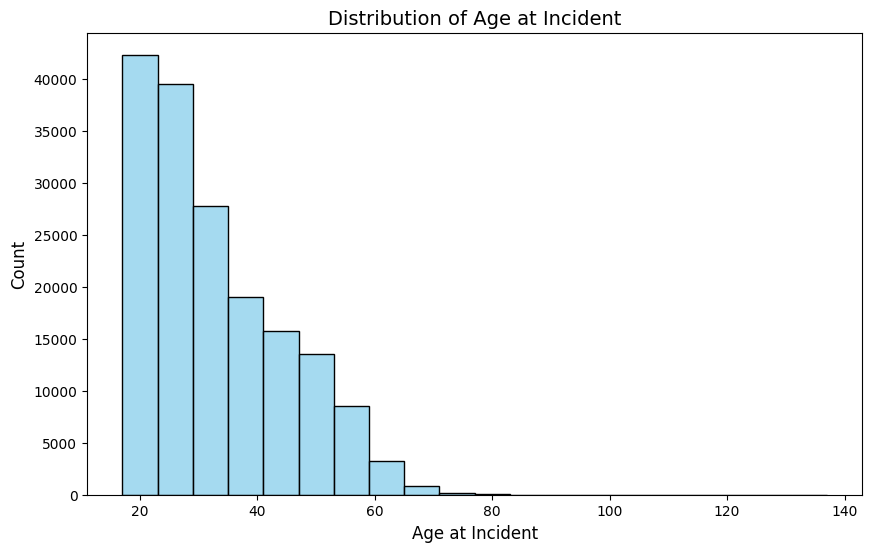

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)

# Create a bar plot of the distribution of 'age_at_incident'
sns.histplot(data=cleaned_sentencing_df, x='age_at_incident', bins=20, kde=False, color='skyblue')

# Set plot labels and title
plt.xlabel('Age at Incident', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Age at Incident', fontsize=14)

# Show the plot
plt.show()

The graph above shows that the most frequent age at incident for offenders in Chicago is between 20 to 30 years old, with a long tail to the right due to a decreasing number of older offenders.

As the above chart shows,

<ipython-input-15-263069dc64c8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_sentencing_df, x='race', palette='Set2')


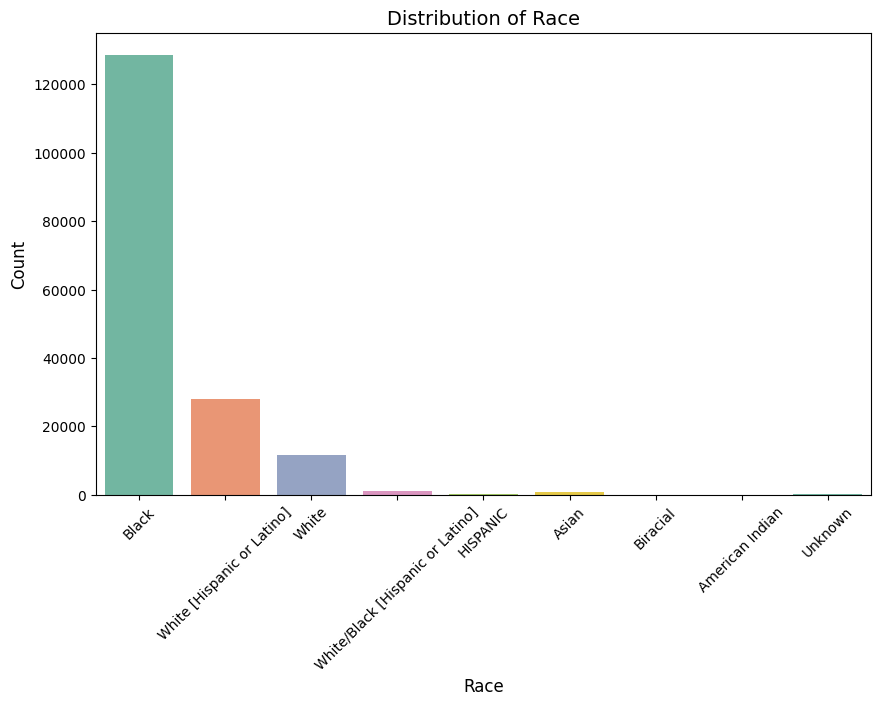

In [ ]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot count plot of race
sns.countplot(data=cleaned_sentencing_df, x='race', palette='Set2')

# Set plot labels and title
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Race', fontsize=14)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

The graph above shows that the most common offenders are

<ipython-input-16-090adc65d3ed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_sentencing_df, x='gender', palette='pastel')


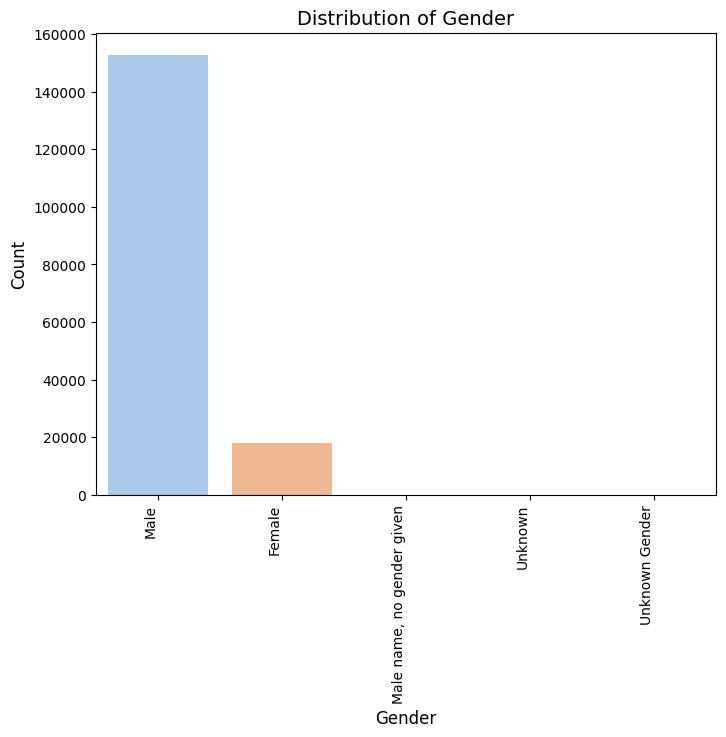

In [ ]:
# Set figure size
plt.figure(figsize=(8, 6))

# Plot count plot of gender
sns.countplot(data=cleaned_sentencing_df, x='gender', palette='pastel')

# Set plot labels and title
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Gender', fontsize=14)

# Customize x-axis labels spacing and rotation
plt.xticks(rotation=90, ha='right')  # Adjust rotation and alignment of x-axis labels

# Show the plot
plt.show()

<ipython-input-17-2b9e7dbb1b96>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_sentencing_df, x='offense_category', order=sorted_offense_categories, palette='pastel')


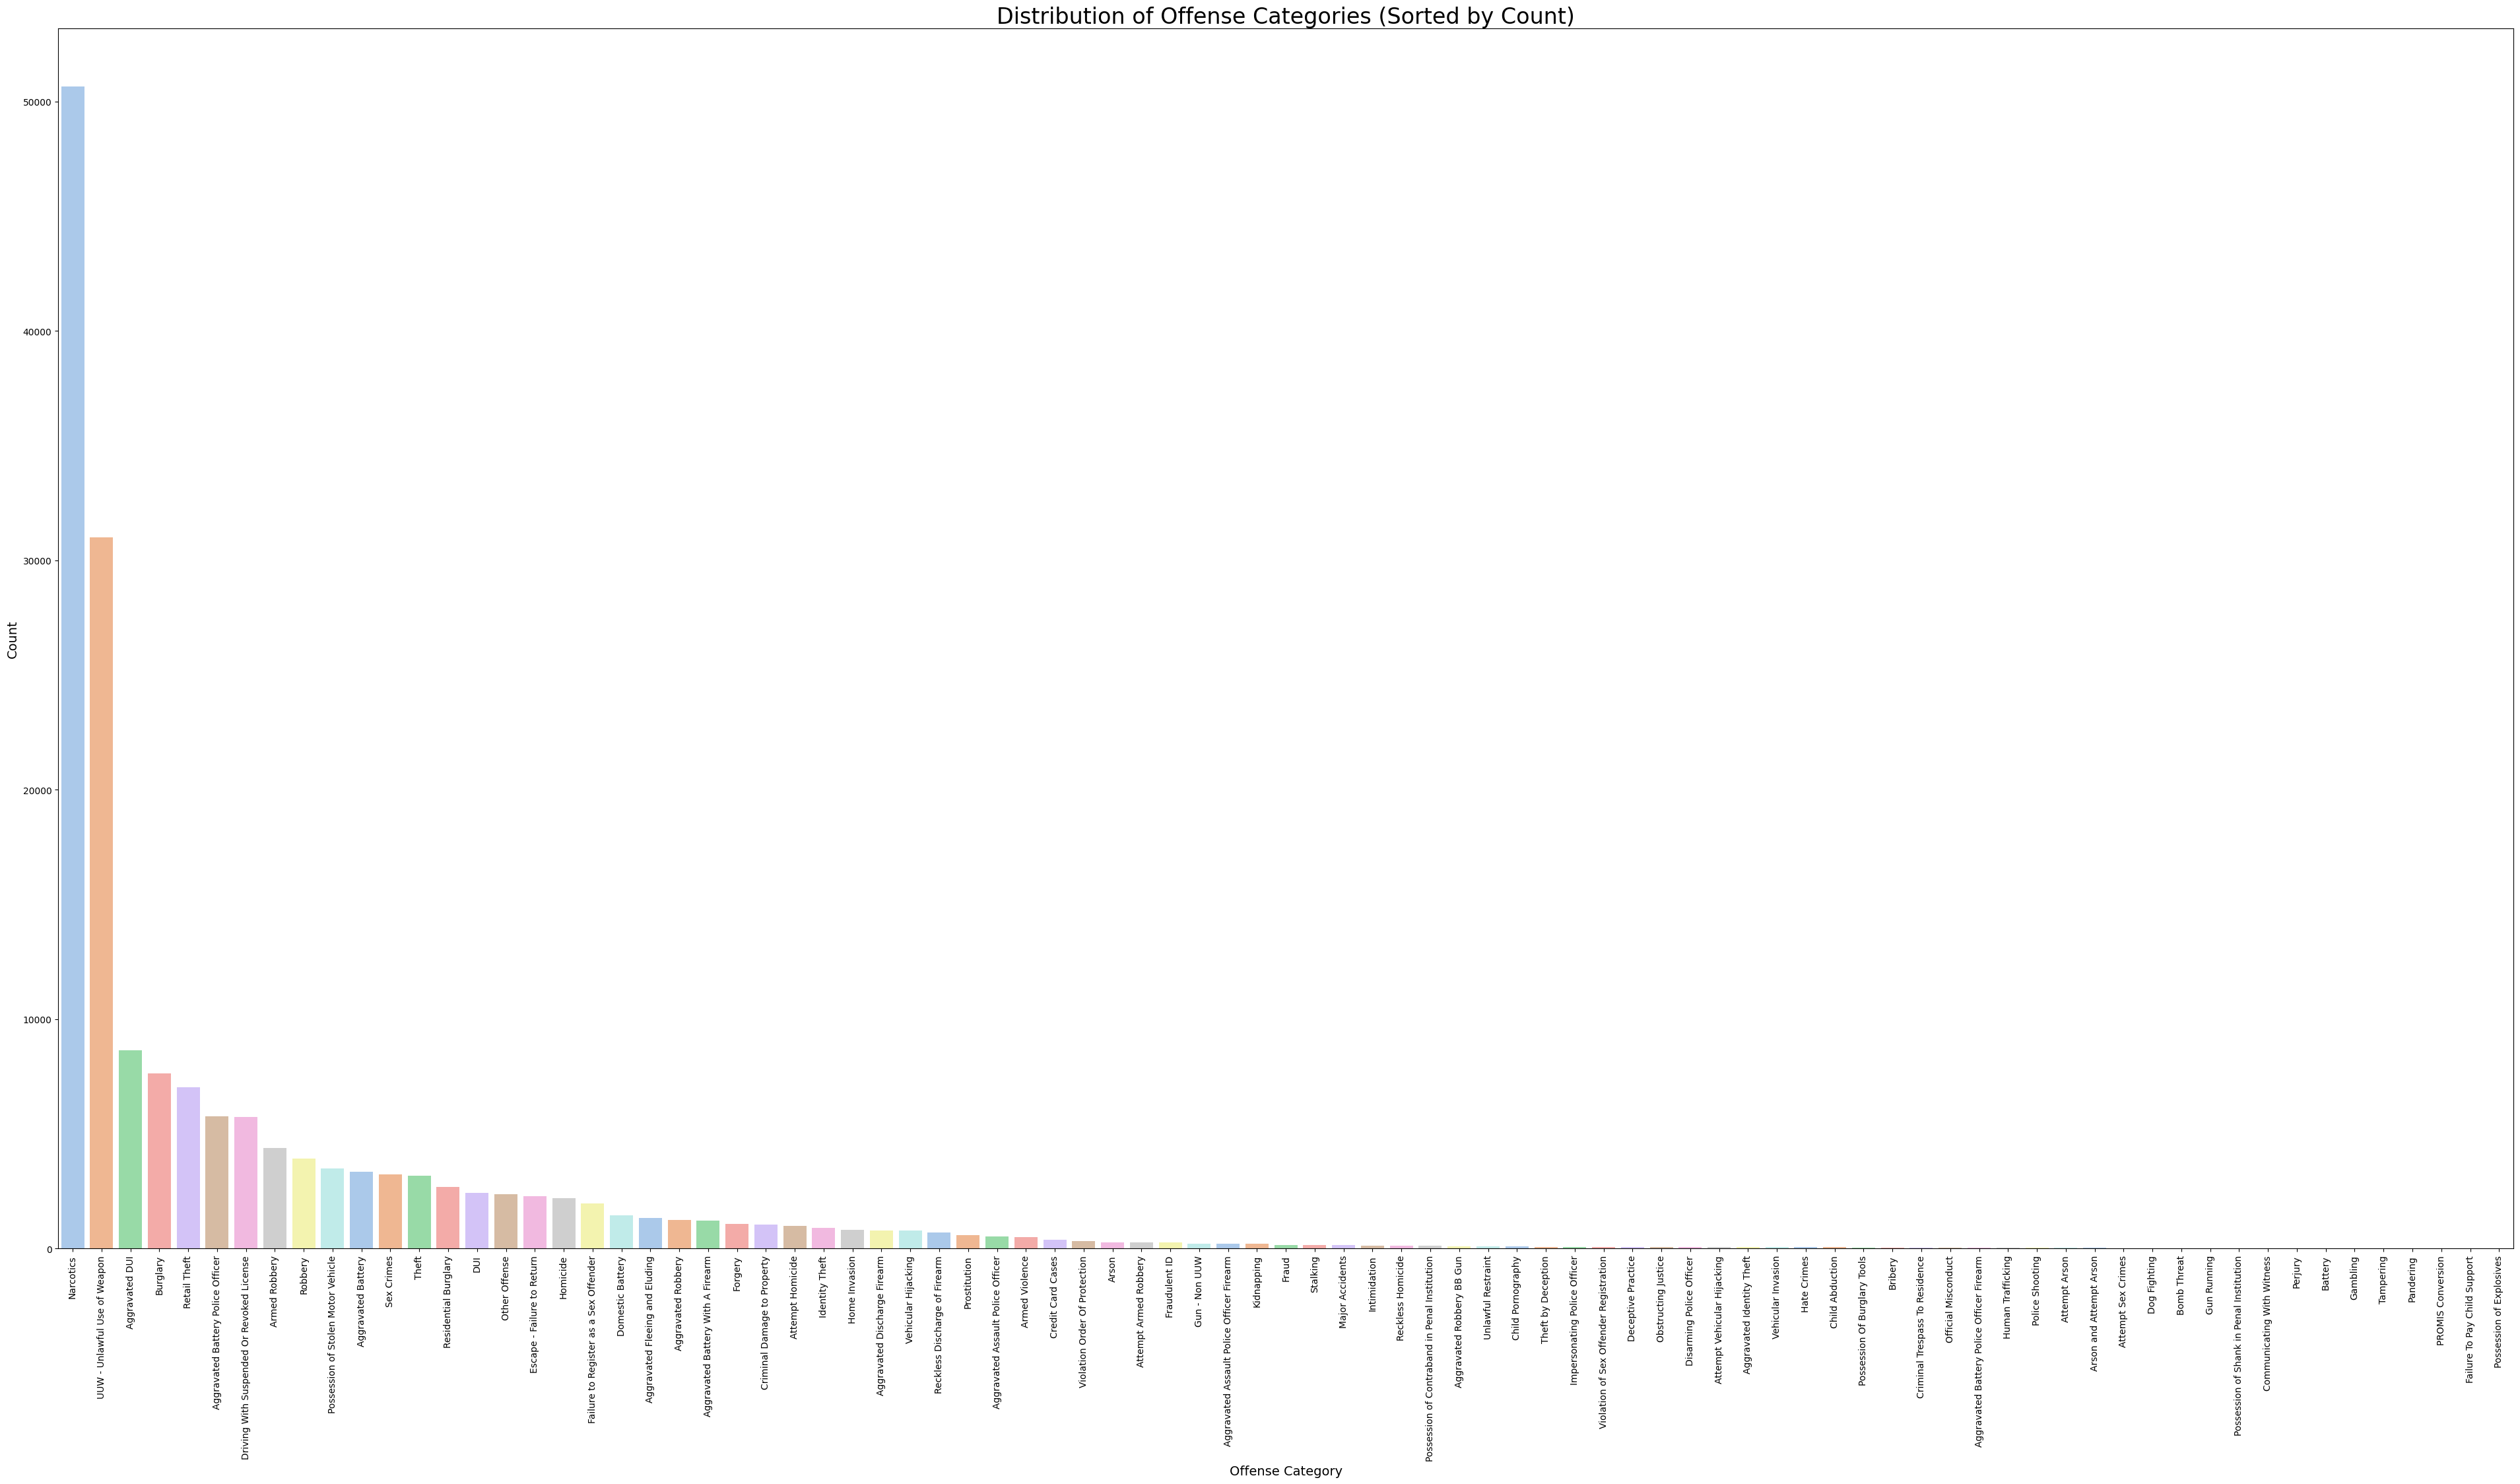

In [ ]:
# Calculate value counts of offense_category
offense_counts = cleaned_sentencing_df['offense_category'].value_counts()

# Sort offense categories by count in descending order
sorted_offense_categories = offense_counts.index.tolist()

# Set figure size
plt.figure(figsize=(48, 24))

# Plot count plot of offense_category (sorted)
sns.countplot(data=cleaned_sentencing_df, x='offense_category', order=sorted_offense_categories, palette='pastel')
plt.title('Distribution of Offense Categories (Sorted by Count)', fontsize=24)
plt.xlabel('Offense Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

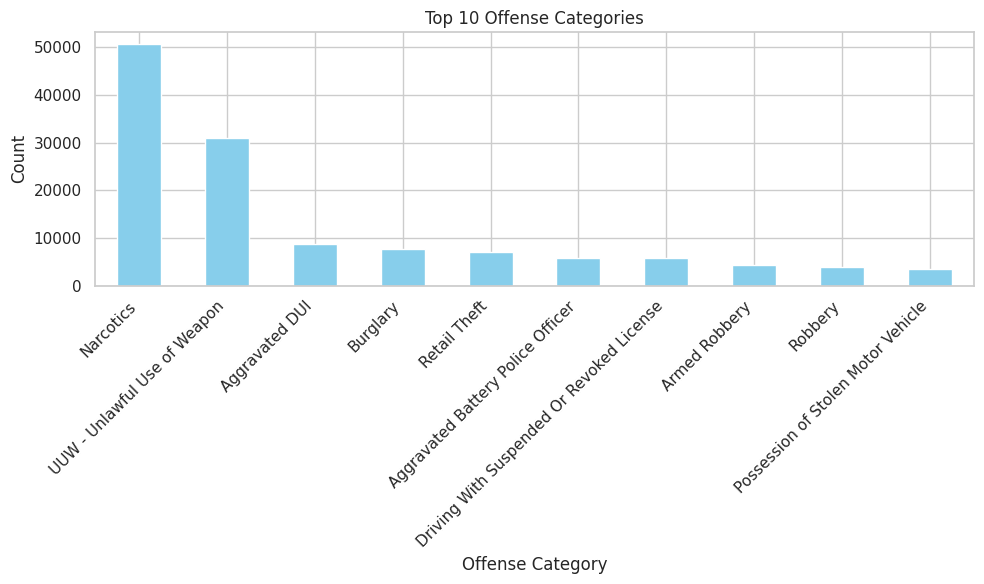

In [ ]:
top_10_offense_categories = cleaned_sentencing_df['offense_category'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_offense_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Offense Categories')
plt.xlabel('Offense Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-18-a330a42a9da2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_sentencing_df, x='sentence_type', palette='pastel')


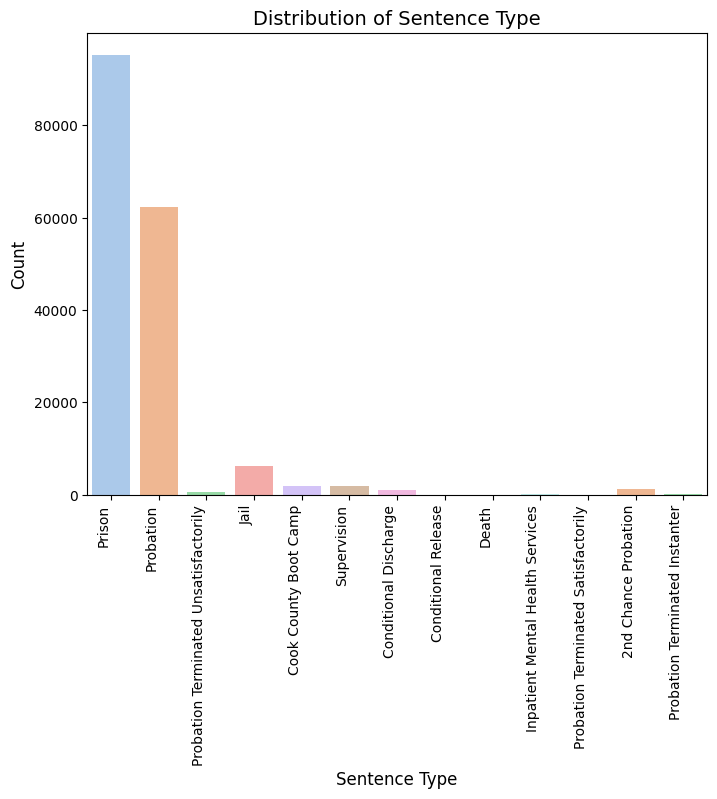

In [ ]:
# Set figure size
plt.figure(figsize=(8, 6))

# Plot count plot of gender
sns.countplot(data=cleaned_sentencing_df, x='sentence_type', palette='pastel')

# Set plot labels and title
plt.xlabel('Sentence Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Sentence Type', fontsize=14)

# Customize x-axis labels spacing and rotation
plt.xticks(rotation=90, ha='right')  # Adjust rotation and alignment of x-axis labels

# Show the plot
plt.show()

### **Sentencing Data: Data Preprocessing & Feature Engineering**


In [ ]:
# Check dtypes of the columns in cleaned_sentencing_df
cleaned_sentencing_df.dtypes

case_participant_id             int64
offense_category               object
arrest_date            datetime64[ns]
sentence_judge                 object
sentence_type                  object
age_at_incident               float64
race                           object
gender                         object
incident_city                  object
repeated                         bool
dtype: object

In [ ]:
# Extract year, month, day from 'arrest_date' and store them in new columns in df
cleaned_sentencing_df['arrest_year'] = cleaned_sentencing_df['arrest_date'].dt.year.astype(float)
cleaned_sentencing_df['arrest_month'] = cleaned_sentencing_df['arrest_date'].dt.month.astype(float)
cleaned_sentencing_df['arrest_day'] = cleaned_sentencing_df['arrest_date'].dt.day.astype(float)

# Define a function for extracting and categorizing the arrest time
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Extract and categorize arrest_time into four catgories: Morning, Afternoon, Evening, or Night
cleaned_sentencing_df['arrest_time'] = cleaned_sentencing_df['arrest_date'].dt.hour.apply(categorize_time)
cleaned_sentencing_df.head()

,case_participant_id,offense_category,arrest_date,sentence_judge,sentence_type,age_at_incident,race,gender,incident_city,repeated,arrest_year,arrest_month,arrest_day,arrest_time
0,670458920516,PROMIS Conversion,2011-07-27 19:39:00,Mary Margaret Brosnahan,Prison,31.0,Black,Male,Chicago,True,2011.0,7.0,27.0,Evening
1,670458920516,PROMIS Conversion,2011-07-27 19:39:00,Mary Margaret Brosnahan,Prison,31.0,Black,Male,Chicago,True,2011.0,7.0,27.0,Evening
2,386948574911,Attempt Homicide,2012-08-07 09:00:00,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,Chicago,True,2012.0,8.0,7.0,Morning
3,386948574911,Attempt Homicide,2012-08-07 09:00:00,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,Chicago,True,2012.0,8.0,7.0,Morning
4,386948574911,Attempt Homicide,2012-08-07 09:00:00,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,Chicago,True,2012.0,8.0,7.0,Morning


In [ ]:
# Let's now remove 'arrest_date' column from the dataframe
cleaned_sentencing_df.drop('arrest_date', axis=1, inplace=True)
cleaned_sentencing_df.dtypes

case_participant_id      int64
offense_category        object
sentence_judge          object
sentence_type           object
age_at_incident        float64
race                    object
gender                  object
incident_city           object
repeated                  bool
arrest_year            float64
arrest_month           float64
arrest_day             float64
arrest_time             object
dtype: object

In [ ]:
# Identify numerical and categorical columns
numerical_features = sorted(cleaned_sentencing_df.select_dtypes(include="float64").columns.tolist())
categorical_features = sorted(cleaned_sentencing_df.select_dtypes(include=["object", "bool"]).columns.tolist())

print(f'There are {len(categorical_features)} categorical variables')
print(f'There are {len(numerical_features)} numerical variables')

There are 8 categorical variables
There are 4 numerical variables


In [ ]:
categorical_features

['arrest_time',
 'gender',
 'incident_city',
 'offense_category',
 'race',
 'repeated',
 'sentence_judge',
 'sentence_type']

First, I preprocess categorical variables:
*   Identify binary categorical variables and change them with 0 and 1
*   Identify ordinal and nominal categorical variables



In [ ]:
# For every 'object' column in cleaned_sentencing_df, see if it has 2 unique values and if so, save to a list
binary_cs_df = cleaned_sentencing_df.copy()
binary_columns = [col for col in binary_cs_df.columns if binary_cs_df[col].nunique() == 2]
binary_columns

['repeated']

In [ ]:
# Create encoder
encoder = OneHotEncoder(drop='first')

# Encode binary columns
encoded_columns = encoder.fit_transform(binary_cs_df[binary_columns])

In [ ]:
# Replace original binary columns with encoded values
binary_cs_df = binary_cs_df.drop(columns=binary_columns)

# Convert encoded values to 1.0/0.0
encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=binary_columns)

# Concatenate the encoded DataFrame with the original DataFrame
binary_cs_df = pd.concat([binary_cs_df, encoded_df], axis=1)
binary_cs_df.head()

,case_participant_id,offense_category,sentence_judge,sentence_type,age_at_incident,race,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated
0,670458920516,PROMIS Conversion,Mary Margaret Brosnahan,Prison,31.0,Black,Male,Chicago,2011.0,7.0,27.0,Evening,1.0
1,670458920516,PROMIS Conversion,Mary Margaret Brosnahan,Prison,31.0,Black,Male,Chicago,2011.0,7.0,27.0,Evening,1.0
2,386948574911,Attempt Homicide,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,Chicago,2012.0,8.0,7.0,Morning,1.0
3,386948574911,Attempt Homicide,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,Chicago,2012.0,8.0,7.0,Morning,1.0
4,386948574911,Attempt Homicide,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,Chicago,2012.0,8.0,7.0,Morning,1.0


For 'incident_city' column, since there were 133 unique values, doing regular nominal category encoding would not be helpful as it would dramatically increase the number of features. Therefore, here, I categorize cities into cities with high crime (1.0) vs low crime (0.0) rate.

In [ ]:
# Calculate the frequency of each city
city_frequency = binary_cs_df['incident_city'].value_counts()

# Define the threshold based on the 75th percentile
threshold = np.percentile(city_frequency, 75)

# Create a boolean mask indicating whether each city's frequency is above (1.0) or below (0.0) the threshold
high_crime_mask = city_frequency >= threshold

# Create a dictionary mapping each city to its crime frequency category
city_crime_category = {city: 1.0 if high_crime_mask[city] else 0.0 for city in city_frequency.index}

# Map the city to its crime category using the dictionary
binary_cs_df['incident_city'] = binary_cs_df['incident_city'].map(city_crime_category)
binary_cs_df.head()

,case_participant_id,offense_category,sentence_judge,sentence_type,age_at_incident,race,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated
0,670458920516,PROMIS Conversion,Mary Margaret Brosnahan,Prison,31.0,Black,Male,1.0,2011.0,7.0,27.0,Evening,1.0
1,670458920516,PROMIS Conversion,Mary Margaret Brosnahan,Prison,31.0,Black,Male,1.0,2011.0,7.0,27.0,Evening,1.0
2,386948574911,Attempt Homicide,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,1.0,2012.0,8.0,7.0,Morning,1.0
3,386948574911,Attempt Homicide,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,1.0,2012.0,8.0,7.0,Morning,1.0
4,386948574911,Attempt Homicide,Nicholas R Ford,Prison,39.0,White [Hispanic or Latino],Male,1.0,2012.0,8.0,7.0,Morning,1.0


I do the same for 'sentence_judge' column as well. I categorize judges into judges with high case load (1.0) vs low case load (0.0).

In [ ]:
# Calculate the frequency of each judge
judge_frequency = binary_cs_df['sentence_judge'].value_counts()

# Define the threshold based on the 75th percentile
threshold_judge = np.percentile(judge_frequency, 75)

# Create a boolean mask indicating whether each judge's frequency is above or below the threshold
high_case_load_mask = judge_frequency >= threshold_judge

# Create a dictionary mapping each judge to their case load category
judge_case_category = {judge: 1.0 if high_case_load_mask[judge] else 0.0 for judge in judge_frequency.index}

# Map the judge to their case load category using the dictionary
binary_cs_df['sentence_judge'] = binary_cs_df['sentence_judge'].map(judge_case_category)
binary_cs_df.head()

,case_participant_id,offense_category,sentence_judge,sentence_type,age_at_incident,race,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated
0,670458920516,PROMIS Conversion,1.0,Prison,31.0,Black,Male,1.0,2011.0,7.0,27.0,Evening,1.0
1,670458920516,PROMIS Conversion,1.0,Prison,31.0,Black,Male,1.0,2011.0,7.0,27.0,Evening,1.0
2,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],Male,1.0,2012.0,8.0,7.0,Morning,1.0
3,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],Male,1.0,2012.0,8.0,7.0,Morning,1.0
4,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],Male,1.0,2012.0,8.0,7.0,Morning,1.0


In [ ]:
# Create copy of binary_cs_df and save in ordered_cs_df
ordered_cs_df = binary_cs_df.copy()

# Identify the columns that represent ordered categories and store them in ordered_features
ordered_features = ['arrest_time']

In [ ]:
ordered_cs_df['arrest_time'].unique()

array(['Evening', 'Morning', 'Afternoon', 'Night'], dtype=object)

In [ ]:
# Extract the ordering of each ordered feature and place them in a list.
# Use a logical ordering of the categories in increasing order
ordered_categories = [
    ['Morning', 'Afternoon', 'Evening', 'Night']
]

In [ ]:
# Apply Ordinal Encoding to ordered columns in the dataset.
encoder = OrdinalEncoder(categories=ordered_categories)

# Fit and transform the ordered features
ordered_cs_df[ordered_features] = encoder.fit_transform(ordered_cs_df[ordered_features])
ordered_cs_df.head()

,case_participant_id,offense_category,sentence_judge,sentence_type,age_at_incident,race,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated
0,670458920516,PROMIS Conversion,1.0,Prison,31.0,Black,Male,1.0,2011.0,7.0,27.0,2.0,1.0
1,670458920516,PROMIS Conversion,1.0,Prison,31.0,Black,Male,1.0,2011.0,7.0,27.0,2.0,1.0
2,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],Male,1.0,2012.0,8.0,7.0,0.0,1.0
3,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],Male,1.0,2012.0,8.0,7.0,0.0,1.0
4,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],Male,1.0,2012.0,8.0,7.0,0.0,1.0


**Binary Encoding for Gender**

Since there are only 11 values that are not Male or Female, I can use binary encoding here.

In [ ]:
ordered_cs_df['gender'].value_counts()

gender
Male                          152871
Female                         17806
Unknown                            6
Unknown Gender                     4
Male name, no gender given         1
Name: count, dtype: int64

In [ ]:
replace_map = {
    'Male': 0,
    'Female': 1
}

# Replace values in the 'gender' column based on the specified mapping
ordered_cs_df['gender'] = ordered_cs_df['gender'].replace(replace_map)
ordered_cs_df['gender'] = ordered_cs_df['gender'].where(ordered_cs_df['gender'].isin([0, 1]))

# Set all other values (e.g., 'Other', 'Unknown') to 1, since "Male" is the mode for this dataset
ordered_cs_df['gender'] = ordered_cs_df['gender'].fillna(1)

In [ ]:
ordered_cs_df['gender'].value_counts()

gender
0    152871
1     17817
Name: count, dtype: int64

In [ ]:
ordered_cs_df.head()

,case_participant_id,offense_category,sentence_judge,sentence_type,age_at_incident,race,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated
0,670458920516,PROMIS Conversion,1.0,Prison,31.0,Black,0,1.0,2011.0,7.0,27.0,2.0,1.0
1,670458920516,PROMIS Conversion,1.0,Prison,31.0,Black,0,1.0,2011.0,7.0,27.0,2.0,1.0
2,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],0,1.0,2012.0,8.0,7.0,0.0,1.0
3,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],0,1.0,2012.0,8.0,7.0,0.0,1.0
4,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],0,1.0,2012.0,8.0,7.0,0.0,1.0


**Encoding Unordered Features**

In [ ]:
# Identify the columns that represent unordered categories and store them in unordered_features
unordered_features = ['offense_category', 'race', 'sentence_type']

In [ ]:
# Create copy of ordered_cs_df and save in encoded_cs_df
encoded_cs_df = ordered_cs_df.copy()

# Apply One Hot Encoding to the unordered features
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(encoded_cs_df[unordered_features])

# Replace the unordered features in encoded_cs_df
encoded_feature_names = encoder.get_feature_names_out(unordered_features)
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names)

# Drop original unordered columns
encoded_cs_df = encoded_cs_df.drop(unordered_features, axis=1)

# Concatenate the encoded DataFrame with the original DataFrame
encoded_cs_df = pd.concat([encoded_cs_df, encoded_df], axis=1)
encoded_cs_df.rename(columns=str.lower, inplace=True)
encoded_cs_df.head()

,case_participant_id,sentence_judge,age_at_incident,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated,offense_category_aggravated assault police officer firearm,offense_category_aggravated battery,offense_category_aggravated battery police officer,offense_category_aggravated battery police officer firearm,offense_category_aggravated battery with a firearm,offense_category_aggravated dui,offense_category_aggravated discharge firearm,offense_category_aggravated fleeing and eluding,offense_category_aggravated identity theft,offense_category_aggravated robbery,offense_category_aggravated robbery bb gun,offense_category_armed robbery,offense_category_armed violence,offense_category_arson,offense_category_arson and attempt arson,offense_category_attempt armed robbery,offense_category_attempt arson,offense_category_attempt homicide,offense_category_attempt sex crimes,offense_category_attempt vehicular hijacking,offense_category_battery,offense_category_bomb threat,offense_category_bribery,offense_category_burglary,offense_category_child abduction,offense_category_child pornography,offense_category_communicating with witness,offense_category_credit card cases,offense_category_criminal damage to property,offense_category_criminal trespass to residence,offense_category_dui,offense_category_deceptive practice,offense_category_disarming police officer,offense_category_dog fighting,offense_category_domestic battery,offense_category_driving with suspended or revoked license,offense_category_escape - failure to return,offense_category_failure to pay child support,offense_category_failure to register as a sex offender,offense_category_forgery,offense_category_fraud,offense_category_fraudulent id,offense_category_gambling,offense_category_gun - non uuw,offense_category_gun running,offense_category_hate crimes,offense_category_home invasion,offense_category_homicide,offense_category_human trafficking,offense_category_identity theft,offense_category_impersonating police officer,offense_category_intimidation,offense_category_kidnapping,offense_category_major accidents,offense_category_narcotics,offense_category_obstructing justice,offense_category_official misconduct,offense_category_other offense,offense_category_promis conversion,offense_category_pandering,offense_category_perjury,offense_category_police shooting,offense_category_possession of burglary tools,offense_category_possession of contraband in penal institution,offense_category_possession of explosives,offense_category_possession of shank in penal institution,offense_category_possession of stolen motor vehicle,offense_category_prostitution,offense_category_reckless discharge of firearm,offense_category_reckless homicide,offense_category_residential burglary,offense_category_retail theft,offense_category_robbery,offense_category_sex crimes,offense_category_stalking,offense_category_tampering,offense_category_theft,offense_category_theft by deception,offense_category_uuw - unlawful use of weapon,offense_category_unlawful restraint,offense_category_vehicular hijacking,offense_category_vehicular invasion,offense_category_violation order of protection,offense_category_violation of sex offender registration,race_asian,race_biracial,race_black,race_hispanic,race_unknown,race_white,race_white [hispanic or latino],race_white/black [hispanic or latino],sentence_type_conditional discharge,sentence_type_conditional release,sentence_type_cook county boot camp,sentence_type_death,sentence_type_inpatient mental health services,sentence_type_jail,sentence_type_prison,sentence_type_probation,sentence_type_probation terminated instanter,sentence_type_probation terminated satisfactorily,sentence_type_probation terminated unsatisfactorily,sentence_type_supervision
0,670458920516,1.0,31.0,0,1.0,2011.0,7.0,27.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
encoded_cs_df.dtypes

case_participant_id                                                 int64
sentence_judge                                                    float64
age_at_incident                                                   float64
gender                                                              int64
incident_city                                                     float64
arrest_year                                                       float64
arrest_month                                                      float64
arrest_day                                                        float64
arrest_time                                                       float64
repeated                                                          float64
offense_category_aggravated assault police officer firearm        float64
offense_category_aggravated battery                               float64
offense_category_aggravated battery police officer                float64
offense_category_aggravated battery po

#### **Check for Outliers**

In [ ]:
encoded_cs_df.loc[encoded_cs_df['age_at_incident'].idxmax()]

case_participant_id                                               2.732413e+12
sentence_judge                                                    1.000000e+00
age_at_incident                                                   1.370000e+02
gender                                                            0.000000e+00
incident_city                                                     1.000000e+00
arrest_year                                                       2.019000e+03
arrest_month                                                      1.000000e+01
arrest_day                                                        1.400000e+01
arrest_time                                                       2.000000e+00
repeated                                                          0.000000e+00
offense_category_aggravated assault police officer firearm        0.000000e+00
offense_category_aggravated battery                               0.000000e+00
offense_category_aggravated battery police officer  

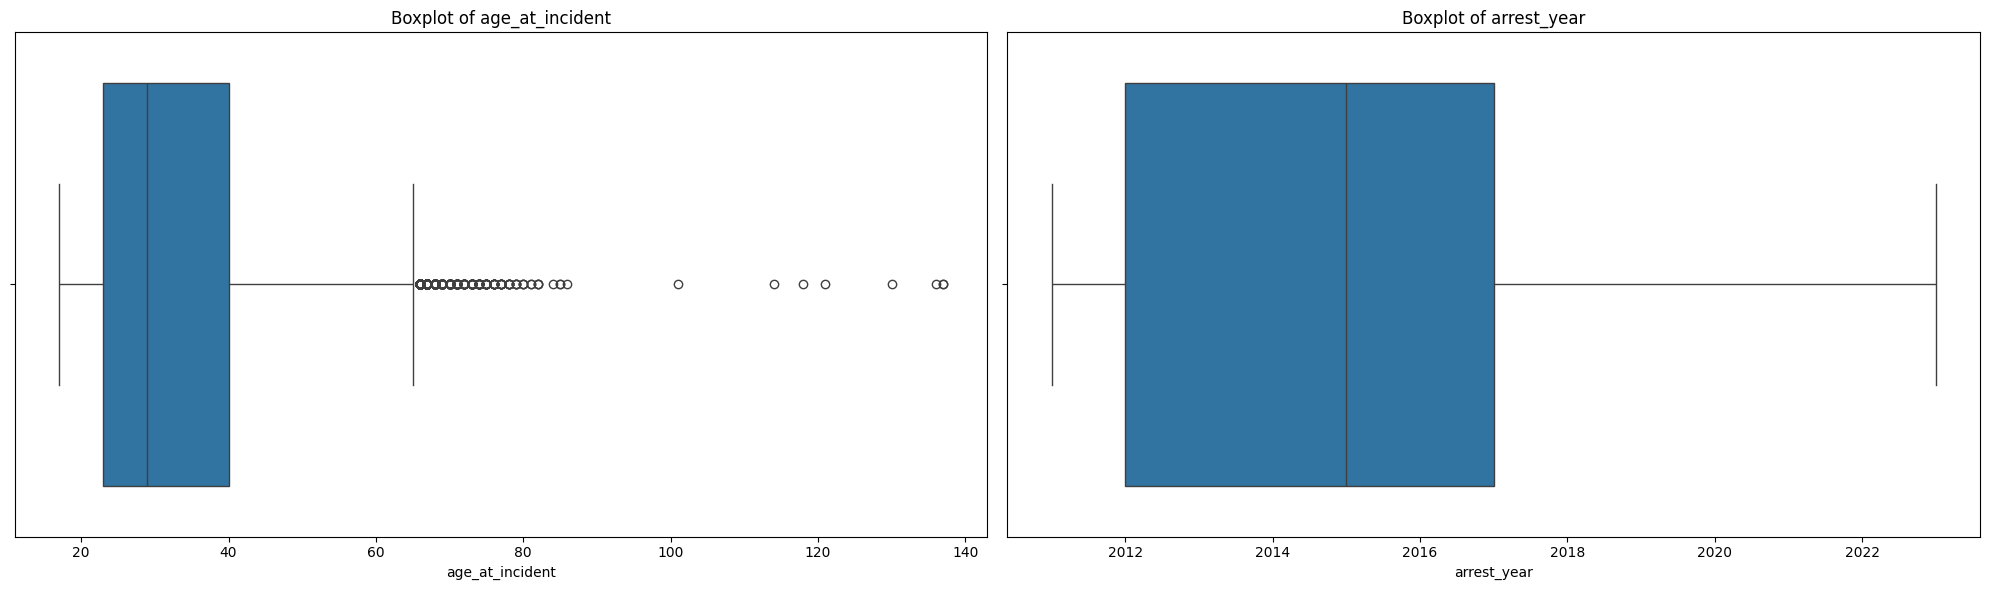

In [ ]:
# Select numeric columns
numeric_columns = ['age_at_incident', 'arrest_year']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(10 * len(numeric_columns), 6))

# Visualize distributions and outliers for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=encoded_cs_df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
# Define a function to remove outliers from a encoded_cs_df
def remove_outliers(df, columns, threshold=1.5):
    """
    Remove outliers from a DataFrame based on the specified columns and threshold.

    Args:
        df (DataFrame): The input DataFrame.
        columns (list): A list of column names to consider for outlier removal.
        threshold (float): The threshold multiplier for defining outliers (default is 1.5).

    Returns:
        DataFrame: The DataFrame with outliers removed.
    """
    cleaned_df = df.copy()
    for col in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = np.percentile(cleaned_df[col], 25)
        Q3 = np.percentile(cleaned_df[col], 75)
        IQR = Q3 - Q1

        # Define the outlier boundaries
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Remove outliers
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

    return cleaned_df

# Define the columns to consider for outlier removal
numeric_columns = ['age_at_incident', 'arrest_year']

# Remove outliers from the DataFrame
cleaned_encoded_cs_df = remove_outliers(encoded_cs_df, numeric_columns)
cleaned_encoded_cs_df.head()

,case_participant_id,sentence_judge,age_at_incident,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated,offense_category_aggravated assault police officer firearm,offense_category_aggravated battery,offense_category_aggravated battery police officer,offense_category_aggravated battery police officer firearm,offense_category_aggravated battery with a firearm,offense_category_aggravated dui,offense_category_aggravated discharge firearm,offense_category_aggravated fleeing and eluding,offense_category_aggravated identity theft,offense_category_aggravated robbery,offense_category_aggravated robbery bb gun,offense_category_armed robbery,offense_category_armed violence,offense_category_arson,offense_category_arson and attempt arson,offense_category_attempt armed robbery,offense_category_attempt arson,offense_category_attempt homicide,offense_category_attempt sex crimes,offense_category_attempt vehicular hijacking,offense_category_battery,offense_category_bomb threat,offense_category_bribery,offense_category_burglary,offense_category_child abduction,offense_category_child pornography,offense_category_communicating with witness,offense_category_credit card cases,offense_category_criminal damage to property,offense_category_criminal trespass to residence,offense_category_dui,offense_category_deceptive practice,offense_category_disarming police officer,offense_category_dog fighting,offense_category_domestic battery,offense_category_driving with suspended or revoked license,offense_category_escape - failure to return,offense_category_failure to pay child support,offense_category_failure to register as a sex offender,offense_category_forgery,offense_category_fraud,offense_category_fraudulent id,offense_category_gambling,offense_category_gun - non uuw,offense_category_gun running,offense_category_hate crimes,offense_category_home invasion,offense_category_homicide,offense_category_human trafficking,offense_category_identity theft,offense_category_impersonating police officer,offense_category_intimidation,offense_category_kidnapping,offense_category_major accidents,offense_category_narcotics,offense_category_obstructing justice,offense_category_official misconduct,offense_category_other offense,offense_category_promis conversion,offense_category_pandering,offense_category_perjury,offense_category_police shooting,offense_category_possession of burglary tools,offense_category_possession of contraband in penal institution,offense_category_possession of explosives,offense_category_possession of shank in penal institution,offense_category_possession of stolen motor vehicle,offense_category_prostitution,offense_category_reckless discharge of firearm,offense_category_reckless homicide,offense_category_residential burglary,offense_category_retail theft,offense_category_robbery,offense_category_sex crimes,offense_category_stalking,offense_category_tampering,offense_category_theft,offense_category_theft by deception,offense_category_uuw - unlawful use of weapon,offense_category_unlawful restraint,offense_category_vehicular hijacking,offense_category_vehicular invasion,offense_category_violation order of protection,offense_category_violation of sex offender registration,race_asian,race_biracial,race_black,race_hispanic,race_unknown,race_white,race_white [hispanic or latino],race_white/black [hispanic or latino],sentence_type_conditional discharge,sentence_type_conditional release,sentence_type_cook county boot camp,sentence_type_death,sentence_type_inpatient mental health services,sentence_type_jail,sentence_type_prison,sentence_type_probation,sentence_type_probation terminated instanter,sentence_type_probation terminated satisfactorily,sentence_type_probation terminated unsatisfactorily,sentence_type_supervision
0,670458920516,1.0,31.0,0,1.0,2011.0,7.0,27.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
# Maximum age in dataframe - make sure outliers are removed
cleaned_encoded_cs_df.loc[cleaned_encoded_cs_df['age_at_incident'].idxmax()] # 65

case_participant_id                                               2.197467e+12
sentence_judge                                                    1.000000e+00
age_at_incident                                                   6.500000e+01
gender                                                            0.000000e+00
incident_city                                                     1.000000e+00
arrest_year                                                       2.011000e+03
arrest_month                                                      1.000000e+00
arrest_day                                                        2.300000e+01
arrest_time                                                       2.000000e+00
repeated                                                          0.000000e+00
offense_category_aggravated assault police officer firearm        0.000000e+00
offense_category_aggravated battery                               0.000000e+00
offense_category_aggravated battery police officer  

In [ ]:
# Minimum year in dataframe - make sure outliers are removed
cleaned_encoded_cs_df.loc[cleaned_encoded_cs_df['arrest_year'].idxmin()] # 2004

case_participant_id                                               6.704589e+11
sentence_judge                                                    1.000000e+00
age_at_incident                                                   3.100000e+01
gender                                                            0.000000e+00
incident_city                                                     1.000000e+00
arrest_year                                                       2.011000e+03
arrest_month                                                      7.000000e+00
arrest_day                                                        2.700000e+01
arrest_time                                                       2.000000e+00
repeated                                                          1.000000e+00
offense_category_aggravated assault police officer firearm        0.000000e+00
offense_category_aggravated battery                               0.000000e+00
offense_category_aggravated battery police officer  

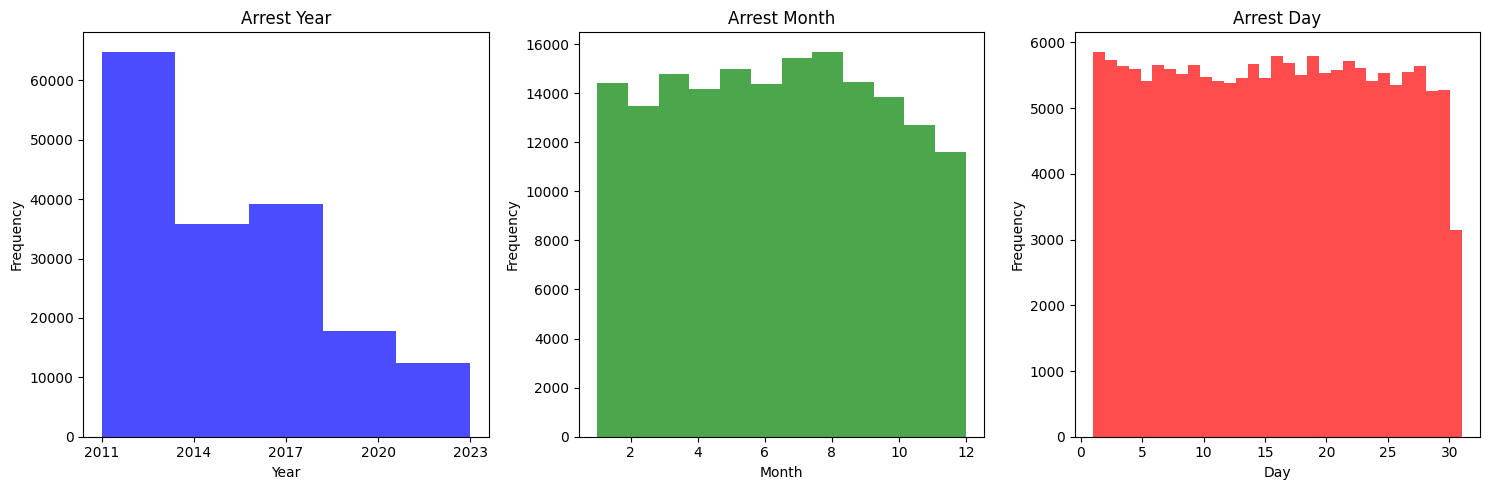

In [ ]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histogram for arrest_year
axes[0].hist(cleaned_encoded_cs_df['arrest_year'], bins=5, color='blue', alpha=0.7)
axes[0].set_title('Arrest Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

# Set xticks for arrest_year
xticks = np.arange(int(np.min(cleaned_encoded_cs_df['arrest_year'])), int(np.max(cleaned_encoded_cs_df['arrest_year']))+1, int((np.max(cleaned_encoded_cs_df['arrest_year'])-np.min(cleaned_encoded_cs_df['arrest_year']))/4))
axes[0].set_xticks(xticks)

# Plot histogram for arrest_month
axes[1].hist(cleaned_encoded_cs_df['arrest_month'], bins=12, color='green', alpha=0.7)
axes[1].set_title('Arrest Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Frequency')

# Plot histogram for arrest_day
axes[2].hist(cleaned_encoded_cs_df['arrest_day'], bins=31, color='red', alpha=0.7)
axes[2].set_title('Arrest Day')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### **Diversion Dataset: EDA and Data Preprocessing**
#### **Remove Unnecessary Columns**

In diversion_df, I will only keep the following columns:

*   **case_participant_id** (integer identifying each defendant - will be used to merge the dataframes)
*   **diversion_program** (string indicating the type of program)
*   referral_date (string indicating when a defendant was referred to diversion program)
*   **diversion_count** (integer indicating the number of diversion programs the defendant was referred to)
*   **diversion_result** (string indicating whether the offender graduated from or failed the program)

In [ ]:
# Keep the columns specified above in diversion_df and save them in cleaned_diversion_df
cleaned_diversion_df = diversion_df.copy()
cleaned_diversion_df = cleaned_diversion_df[["case_participant_id", "diversion_program", "diversion_count", "diversion_result"]]
cleaned_diversion_df.head()

# Remove NaN values in cleaned_diversion_df
cleaned_diversion_df.dropna(inplace=True)
cleaned_diversion_df.isna().sum()

# Reset index
cleaned_diversion_df.reset_index(drop=True, inplace=True)

cleaned_diversion_df.head()

,case_participant_id,diversion_program,diversion_count,diversion_result
0,2193361164603,DS,2,Graduated
1,2193390288678,MHC,1,Failed
2,2193494552866,DS,1,Graduated
3,2193661725056,DS,1,Graduated
4,2193763950558,DS,1,Graduated


**Check for Outliers**

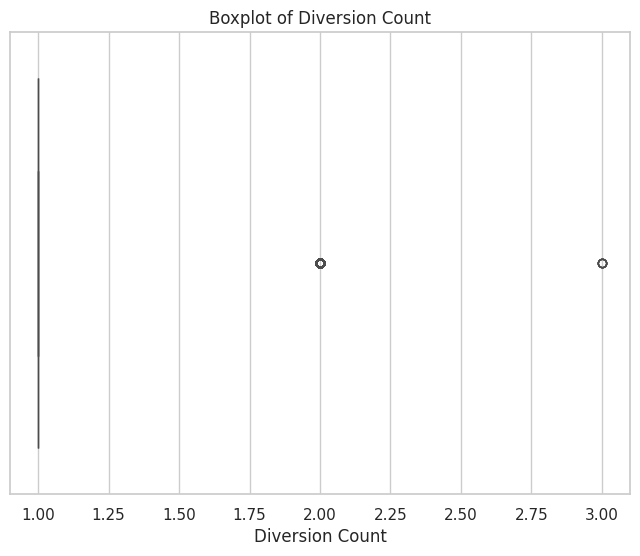

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_diversion_df['diversion_count'])
plt.title('Boxplot of Diversion Count')
plt.xlabel('Diversion Count')
plt.show()

<ipython-input-48-4dd6cb722e05>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_diversion_df, x='diversion_count', palette='pastel')


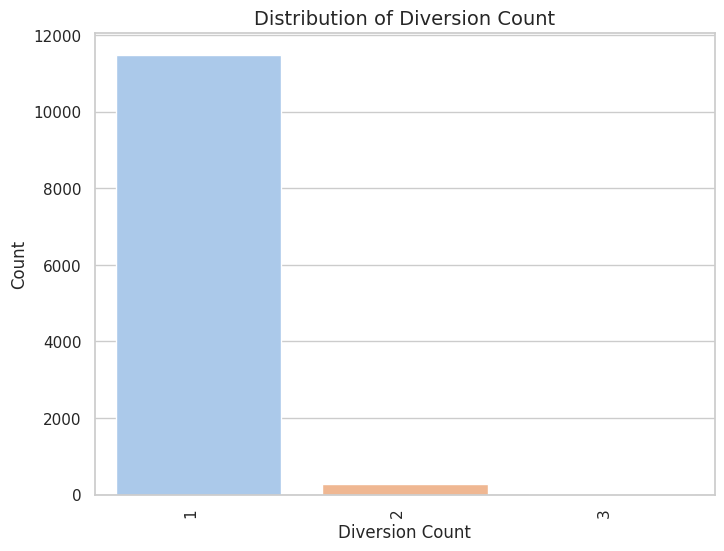

In [ ]:
# Set figure size
plt.figure(figsize=(8, 6))

# Plot count plot
sns.countplot(data=cleaned_diversion_df, x='diversion_count', palette='pastel')

# Set plot labels and title
plt.xlabel('Diversion Count', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Diversion Count', fontsize=14)

# Customize x-axis labels spacing and rotation
plt.xticks(rotation=90, ha='right')  # Adjust rotation and alignment of x-axis labels

# Show the plot
plt.show()

<ipython-input-49-0a3481e3539f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_diversion_df, x='diversion_program', palette='pastel')


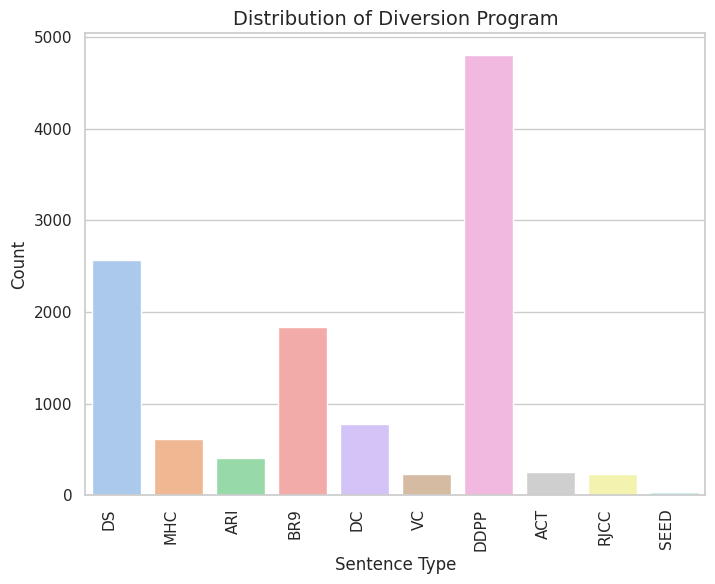

In [ ]:
# Set figure size
plt.figure(figsize=(8, 6))

# Plot count plot
sns.countplot(data=cleaned_diversion_df, x='diversion_program', palette='pastel')

# Set plot labels and title
plt.xlabel('Sentence Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Diversion Program', fontsize=14)

# Customize x-axis labels spacing and rotation
plt.xticks(rotation=90, ha='right')  # Adjust rotation and alignment of x-axis labels

# Show the plot
plt.show()

<ipython-input-50-b4c2bff01c4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_diversion_df, x='diversion_result', palette='pastel')


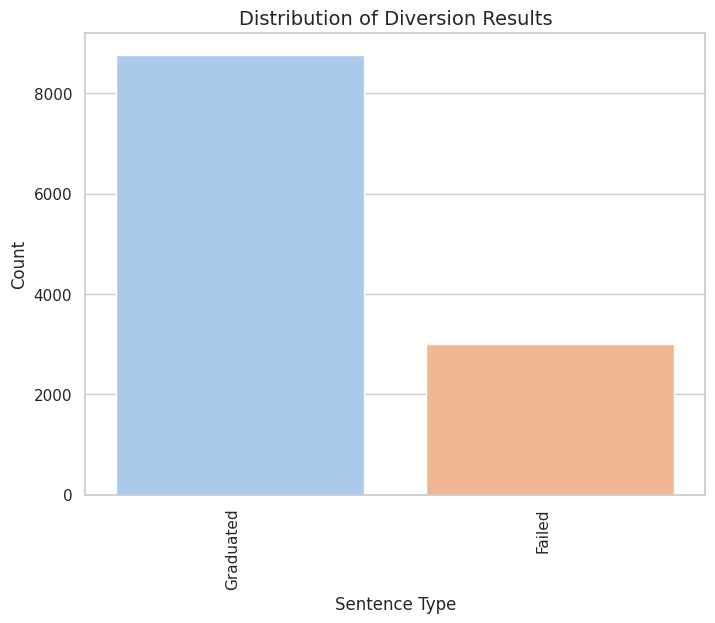

In [ ]:
# Set figure size
plt.figure(figsize=(8, 6))

# Plot count plot
sns.countplot(data=cleaned_diversion_df, x='diversion_result', palette='pastel')

# Set plot labels and title
plt.xlabel('Sentence Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Diversion Results', fontsize=14)

# Customize x-axis labels spacing and rotation
plt.xticks(rotation=90, ha='right')  # Adjust rotation and alignment of x-axis labels

# Show the plot
plt.show()

In [ ]:
#use one-hot encoding for diversion program and diversion result
unordered_features = ["diversion_program", "diversion_result"]
numerical_features = ["case_participant_id", "diversion_count"]

# Apply One Hot Encoding to the unordered features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(cleaned_diversion_df[unordered_features])

# Replace the unordered features in encoded_cs_df
encoded_feature_names = encoder.get_feature_names_out(unordered_features)
encoded_diversion_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
encoded_diversion_df = pd.concat([cleaned_diversion_df[numerical_features], encoded_diversion_df], axis=1)
encoded_diversion_df.head()

,case_participant_id,diversion_count,diversion_program_ACT,diversion_program_ARI,diversion_program_BR9,diversion_program_DC,diversion_program_DDPP,diversion_program_DS,diversion_program_MHC,diversion_program_RJCC,diversion_program_SEED,diversion_program_VC,diversion_result_Failed,diversion_result_Graduated
0,2193361164603,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2193390288678,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2193494552866,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2193661725056,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2193763950558,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### **Joining the Sentencing and Diversion Datasets**
I will do a left outer join of the cleaned sentencing dataset with the cleaned diversion dataset. For entries in the sentencing dataset that are not in the diversion dataset, I assume the offender they never participated in diversion programs at all.

In [ ]:
# Merge dataframes
merged_df = pd.merge(cleaned_encoded_cs_df, encoded_diversion_df, on="case_participant_id", how="left")
merged_df.head()

,case_participant_id,sentence_judge,age_at_incident,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated,offense_category_aggravated assault police officer firearm,offense_category_aggravated battery,offense_category_aggravated battery police officer,offense_category_aggravated battery police officer firearm,offense_category_aggravated battery with a firearm,offense_category_aggravated dui,offense_category_aggravated discharge firearm,offense_category_aggravated fleeing and eluding,offense_category_aggravated identity theft,offense_category_aggravated robbery,offense_category_aggravated robbery bb gun,offense_category_armed robbery,offense_category_armed violence,offense_category_arson,offense_category_arson and attempt arson,offense_category_attempt armed robbery,offense_category_attempt arson,offense_category_attempt homicide,offense_category_attempt sex crimes,offense_category_attempt vehicular hijacking,offense_category_battery,offense_category_bomb threat,offense_category_bribery,offense_category_burglary,offense_category_child abduction,offense_category_child pornography,offense_category_communicating with witness,offense_category_credit card cases,offense_category_criminal damage to property,offense_category_criminal trespass to residence,offense_category_dui,offense_category_deceptive practice,offense_category_disarming police officer,offense_category_dog fighting,offense_category_domestic battery,offense_category_driving with suspended or revoked license,offense_category_escape - failure to return,offense_category_failure to pay child support,offense_category_failure to register as a sex offender,offense_category_forgery,offense_category_fraud,offense_category_fraudulent id,offense_category_gambling,offense_category_gun - non uuw,offense_category_gun running,offense_category_hate crimes,offense_category_home invasion,offense_category_homicide,offense_category_human trafficking,offense_category_identity theft,offense_category_impersonating police officer,offense_category_intimidation,offense_category_kidnapping,offense_category_major accidents,offense_category_narcotics,offense_category_obstructing justice,offense_category_official misconduct,offense_category_other offense,offense_category_promis conversion,offense_category_pandering,offense_category_perjury,offense_category_police shooting,offense_category_possession of burglary tools,offense_category_possession of contraband in penal institution,offense_category_possession of explosives,offense_category_possession of shank in penal institution,offense_category_possession of stolen motor vehicle,offense_category_prostitution,offense_category_reckless discharge of firearm,offense_category_reckless homicide,offense_category_residential burglary,offense_category_retail theft,offense_category_robbery,offense_category_sex crimes,offense_category_stalking,offense_category_tampering,offense_category_theft,offense_category_theft by deception,offense_category_uuw - unlawful use of weapon,offense_category_unlawful restraint,offense_category_vehicular hijacking,offense_category_vehicular invasion,offense_category_violation order of protection,offense_category_violation of sex offender registration,race_asian,race_biracial,race_black,race_hispanic,race_unknown,race_white,race_white [hispanic or latino],race_white/black [hispanic or latino],sentence_type_conditional discharge,sentence_type_conditional release,sentence_type_cook county boot camp,sentence_type_death,sentence_type_inpatient mental health services,sentence_type_jail,sentence_type_prison,sentence_type_probation,sentence_type_probation terminated instanter,sentence_type_probation terminated satisfactorily,sentence_type_probation terminated unsatisfactorily,sentence_type_supervision,diversion_count,diversion_program_ACT,diversion_program_ARI,diversion_program_BR9,diversion_program_DC,diversion_program_DDPP,diversion_program_DS,diversion_program_MHC,diversion_program_RJCC,diversion_program_SEED,di

In [ ]:
len(merged_df)

170126

In [ ]:
#diversion_count: NaN is imputed to 0
#diversion_program columns: NaN is imputed to 0
#diversion_result_failed and diversion_result_graduated: NaN is imputed to 0

from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='constant' and fill_value=0
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit and transform the df
imputed_df = pd.DataFrame(imputer.fit_transform(merged_df), columns=merged_df.columns)

In [ ]:
imputed_df.head()

,case_participant_id,sentence_judge,age_at_incident,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated,offense_category_aggravated assault police officer firearm,offense_category_aggravated battery,offense_category_aggravated battery police officer,offense_category_aggravated battery police officer firearm,offense_category_aggravated battery with a firearm,offense_category_aggravated dui,offense_category_aggravated discharge firearm,offense_category_aggravated fleeing and eluding,offense_category_aggravated identity theft,offense_category_aggravated robbery,offense_category_aggravated robbery bb gun,offense_category_armed robbery,offense_category_armed violence,offense_category_arson,offense_category_arson and attempt arson,offense_category_attempt armed robbery,offense_category_attempt arson,offense_category_attempt homicide,offense_category_attempt sex crimes,offense_category_attempt vehicular hijacking,offense_category_battery,offense_category_bomb threat,offense_category_bribery,offense_category_burglary,offense_category_child abduction,offense_category_child pornography,offense_category_communicating with witness,offense_category_credit card cases,offense_category_criminal damage to property,offense_category_criminal trespass to residence,offense_category_dui,offense_category_deceptive practice,offense_category_disarming police officer,offense_category_dog fighting,offense_category_domestic battery,offense_category_driving with suspended or revoked license,offense_category_escape - failure to return,offense_category_failure to pay child support,offense_category_failure to register as a sex offender,offense_category_forgery,offense_category_fraud,offense_category_fraudulent id,offense_category_gambling,offense_category_gun - non uuw,offense_category_gun running,offense_category_hate crimes,offense_category_home invasion,offense_category_homicide,offense_category_human trafficking,offense_category_identity theft,offense_category_impersonating police officer,offense_category_intimidation,offense_category_kidnapping,offense_category_major accidents,offense_category_narcotics,offense_category_obstructing justice,offense_category_official misconduct,offense_category_other offense,offense_category_promis conversion,offense_category_pandering,offense_category_perjury,offense_category_police shooting,offense_category_possession of burglary tools,offense_category_possession of contraband in penal institution,offense_category_possession of explosives,offense_category_possession of shank in penal institution,offense_category_possession of stolen motor vehicle,offense_category_prostitution,offense_category_reckless discharge of firearm,offense_category_reckless homicide,offense_category_residential burglary,offense_category_retail theft,offense_category_robbery,offense_category_sex crimes,offense_category_stalking,offense_category_tampering,offense_category_theft,offense_category_theft by deception,offense_category_uuw - unlawful use of weapon,offense_category_unlawful restraint,offense_category_vehicular hijacking,offense_category_vehicular invasion,offense_category_violation order of protection,offense_category_violation of sex offender registration,race_asian,race_biracial,race_black,race_hispanic,race_unknown,race_white,race_white [hispanic or latino],race_white/black [hispanic or latino],sentence_type_conditional discharge,sentence_type_conditional release,sentence_type_cook county boot camp,sentence_type_death,sentence_type_inpatient mental health services,sentence_type_jail,sentence_type_prison,sentence_type_probation,sentence_type_probation terminated instanter,sentence_type_probation terminated satisfactorily,sentence_type_probation terminated unsatisfactorily,sentence_type_supervision,diversion_count,diversion_program_ACT,diversion_program_ARI,diversion_program_BR9,diversion_program_DC,diversion_program_DDPP,diversion_program_DS,diversion_program_MHC,diversion_program_RJCC,diversion_program_SEED,di

In [ ]:
# Remove NaN values
imputed_df.dropna(inplace=True)

### **Class Imbalance and Train Test Split**

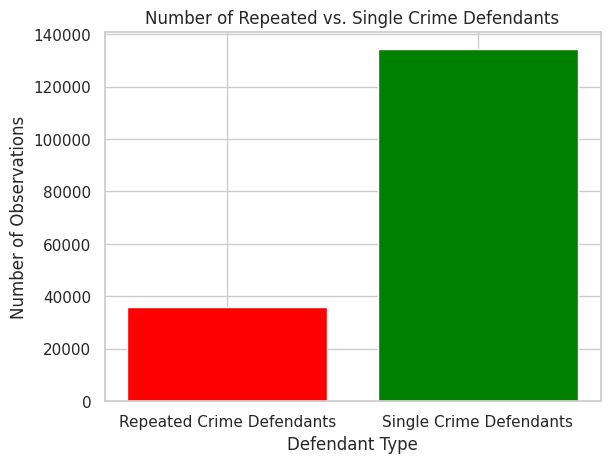

In [ ]:
# Calculate the counts of repeated and single crime defendants
counts = imputed_df['repeated'].value_counts()

# Create a bar graph
labels = ['Repeated Crime Defendants', 'Single Crime Defendants']
counts_values = [counts.get(1.0, 0), counts.get(0.0, 0)]  # Get counts for both categories, defaulting to 0 if category not present

plt.bar(labels, counts_values, color=['red', 'green'])
plt.title('Number of Repeated vs. Single Crime Defendants')
plt.xlabel('Defendant Type')
plt.ylabel('Number of Observations')
plt.show()

In [ ]:
imputed_df['repeated'].value_counts()

repeated
0.0    134237
1.0     35889
Name: count, dtype: int64

In [ ]:
# Find the ratio
class_ratio = counts[0] / counts[1]
print(f'Target variable has {class_ratio:.2f}x more observations in the negative (majority) class than the positive (minority) class.')

Target variable has 3.74x more observations in the negative (majority) class than the positive (minority) class.


**Correlation Matrix**


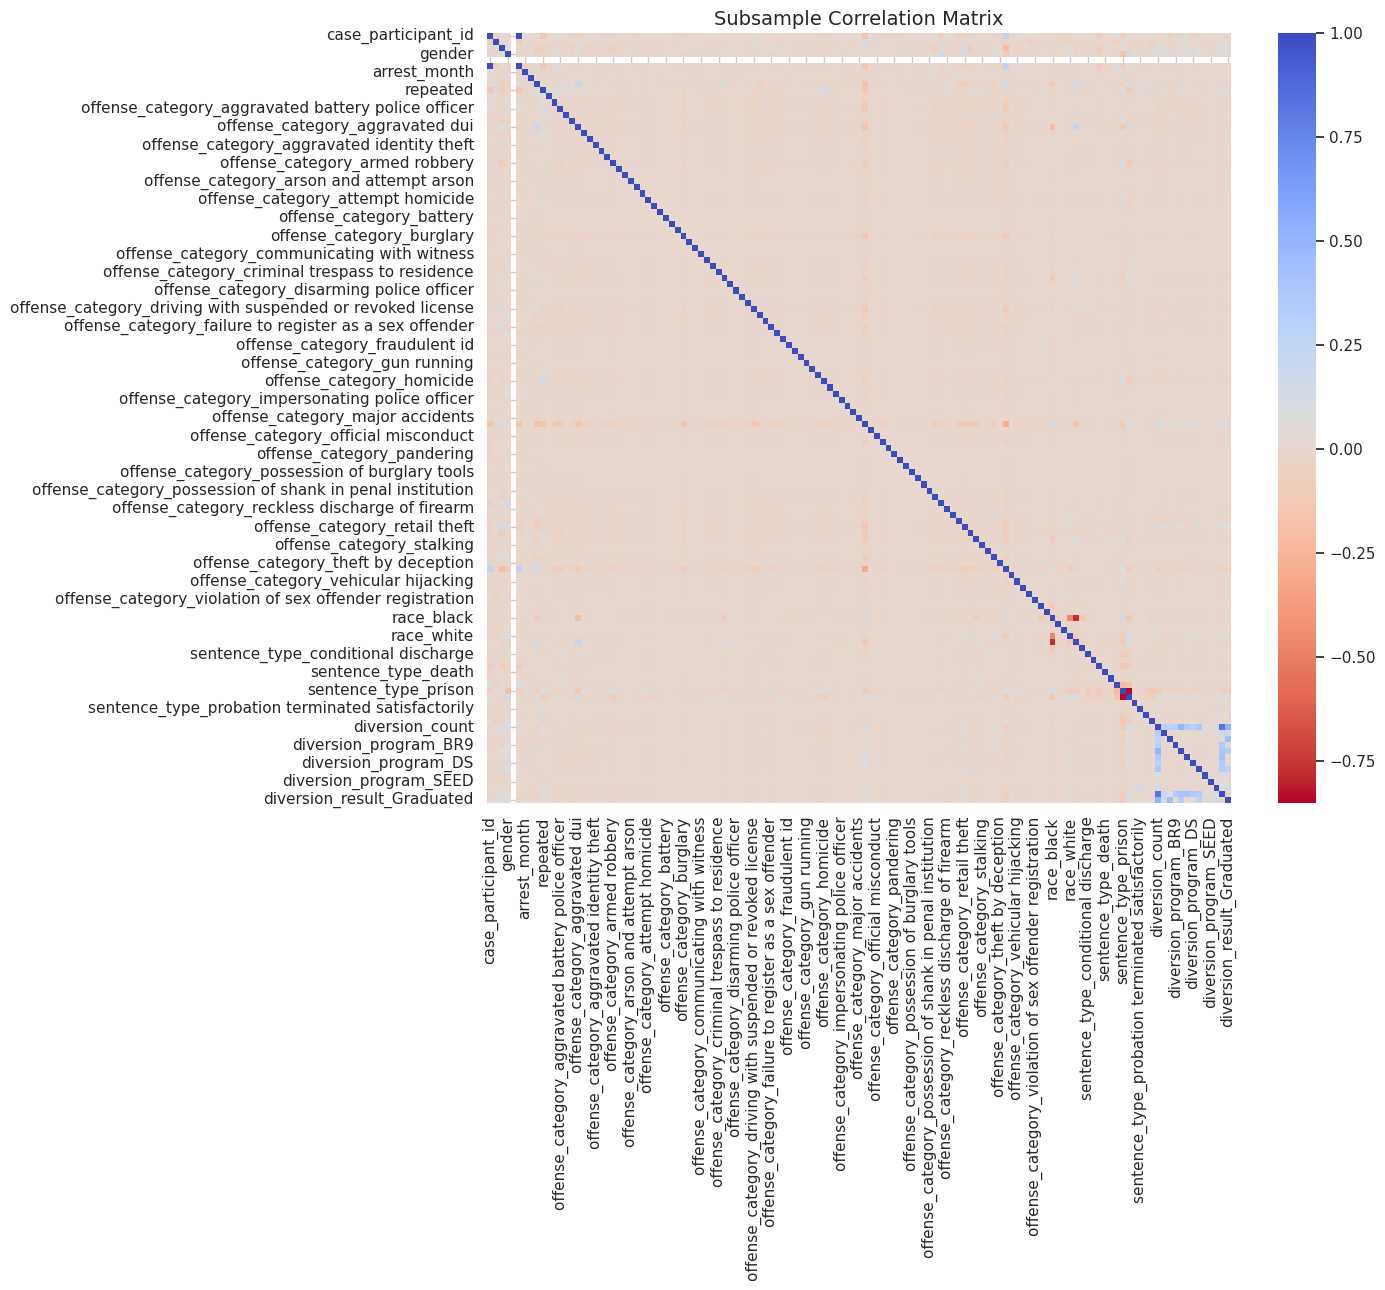

In [ ]:
imputed_df = imputed_df.drop('case_participant_id', axis=1)
fig, ax2 = plt.subplots(1, 1, figsize=(12, 10))

# Calculate the correlation matrix
corr = imputed_df.corr()

# Plot the correlation matrix using seaborn heatmap
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 12}, ax=ax2)
ax2.set_title('Correlation Matrix', fontsize=14)
plt.show()

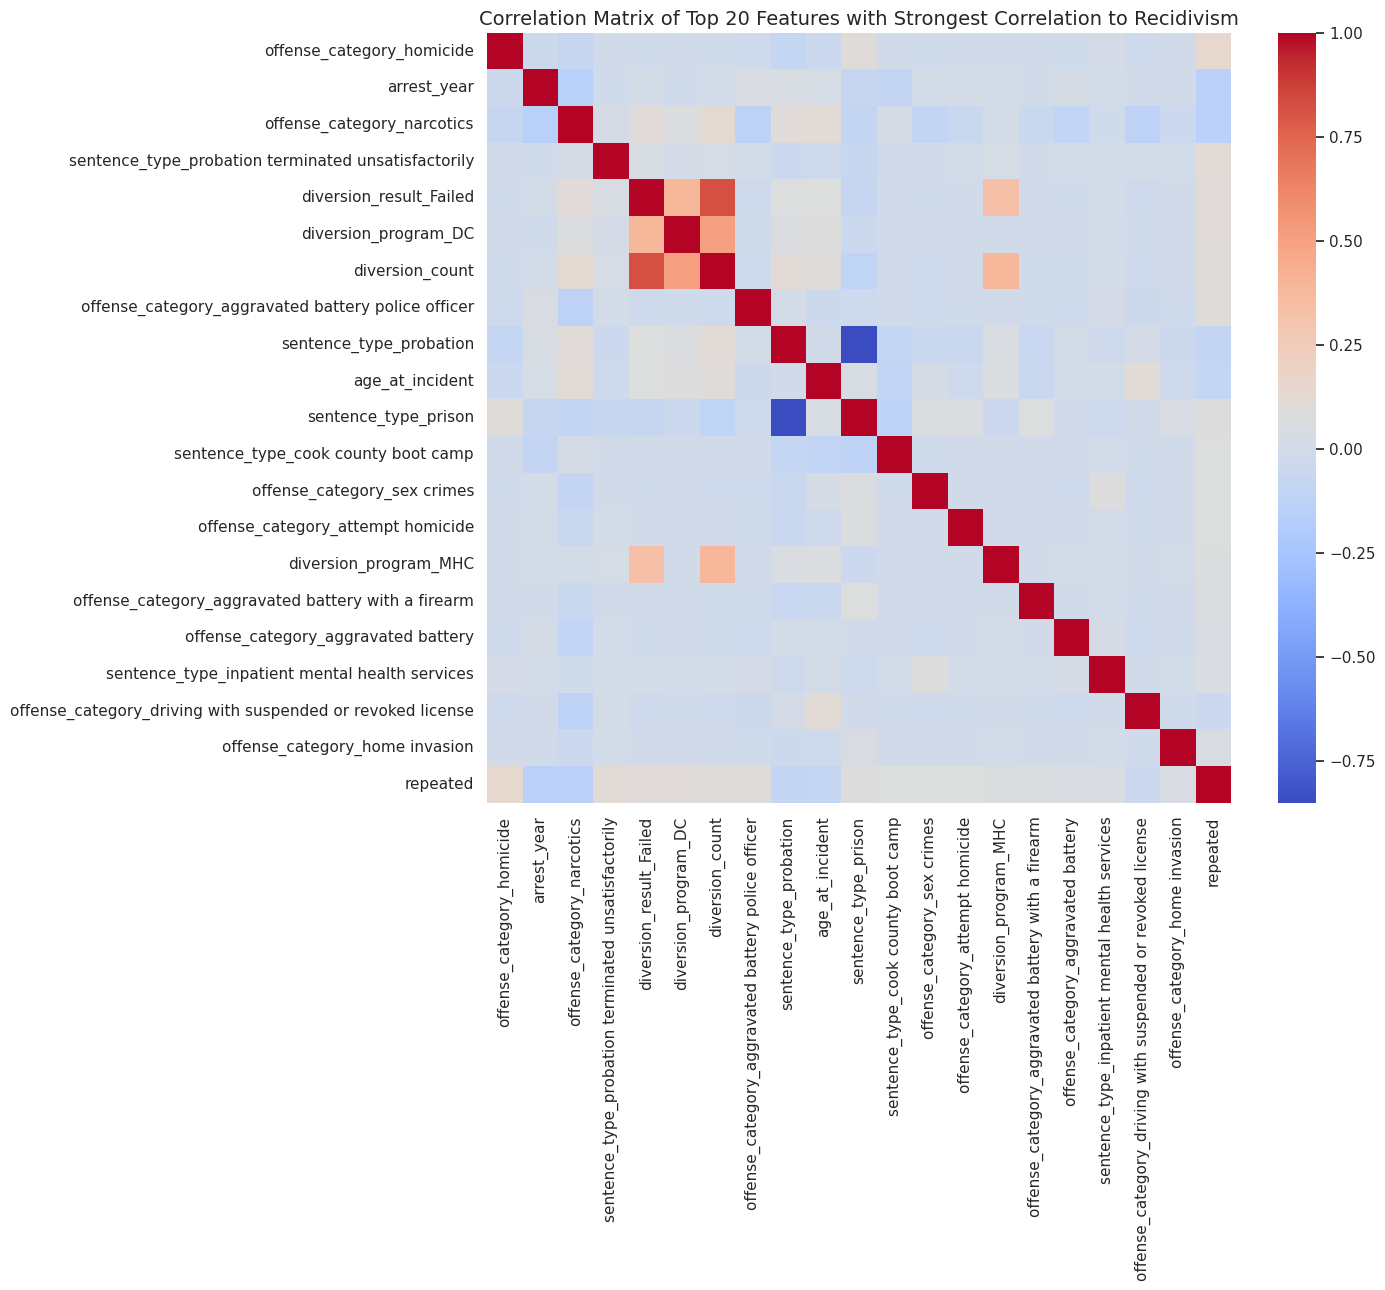

In [ ]:
correlations = imputed_df.corr()['repeated'].abs().sort_values(ascending=False)

# Select top 20 features
top_features = correlations[1:21].index.tolist()

# Create a subset DataFrame containing only the top 20 features and 'repeated'
subset_df = imputed_df[top_features + ['repeated']]

# Calculate the correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title("Correlation Matrix of Top 20 Features with Strongest Correlation to Recidivism", fontsize=14)
plt.show()

In [ ]:
# Assign features to x and label to y
x = imputed_df.drop(columns=['repeated'])
y = imputed_df['repeated']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

# DO NOT CHANGE ----------------------------------------------------------------
print(f'Training data set has size {X_train.shape} and {y_train.shape}')
print(f'Testing data set has size {X_test.shape} and {y_test.shape}')

Training data set has size (136100, 125) and (136100,)
Testing data set has size (34026, 125) and (34026,)


**Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.40)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [ ]:
# Scale the numerical features
scaler = StandardScaler()

# Select numerical features, excluding 'repeated' column
numerical_columns = merged_df.select_dtypes(include=['float']).columns
features_scale = [col for col in numerical_columns if col != 'repeated']

# Fit and transform the training data
X_train[features_scale] = scaler.fit_transform(X_train[features_scale])

# Transform the testing data using the learned parameters from the training data
X_test[features_scale] = scaler.transform(X_test[features_scale])

# Convert X_train, y_train, X_test, y_test into numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### **Baseline Model**
I used random forest classifier for our baseline model.

In [ ]:
# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

y_train_pred_baseline = rf_classifier.predict(X_train)

# Predict on the testing data
y_pred_baseline = rf_classifier.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_baseline)

# Calculate precision
precision = precision_score(y_test, y_pred_baseline)

# Calculate recall
recall = recall_score(y_test, y_pred_baseline)

# Compute the average precision score (AUPRC)
auprc = average_precision_score(y_test, y_pred_baseline)

**Random Forest Classifier Performance**

For this classification model, training scores are significantly higher than testing scores across the metrics I used of AUPRC, accuracy, recall, and precision. This suggests the model is overfitting, learning to fit the training data too closely, capturing noise that does not generalize to the test set.

In [ ]:
print('Baseline Random Forest Classifier Performance')
print(f'Training ROC AUC: {roc_auc_score(y_train, y_train_pred_baseline)*100:.2f}%')
print(f'Testing ROC AUC: {roc_auc_score(y_test, y_pred_baseline)*100:.2f}%')
print(f'Training AUPRC: {average_precision_score(y_train, y_train_pred_baseline)*100:.2f}%')
print(f'Testing AUPRC: {auprc*100:.2f}%')
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred_baseline)*100:.2f}%')
print(f'Testing Accuracy: {accuracy*100:.2f}%')
print(f'Training Recall: {recall_score(y_train, y_train_pred_baseline)*100:.2f}%')
print(f'Testing Recall: {recall*100:.2f}%')
print(f'Training Precision: {precision_score(y_train, y_train_pred_baseline)*100:.2f}%')
print(f'Testing Precision: {precision*100:.2f}%')

Baseline Random Forest Classifier Performance
Training ROC AUC: 99.69%
Testing ROC AUC: 84.85%
Training AUPRC: 99.25%
Testing AUPRC: 64.61%
Training Accuracy: 99.75%
Testing Accuracy: 90.55%
Training Recall: 99.55%
Testing Recall: 74.99%
Training Precision: 99.56%
Testing Precision: 79.12%


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()

# Define the parameter grid for RandomSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create RandomSearchCV object with optimized parameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   scoring='average_precision', cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the RandomSearchCV object on the training data
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf = random_search.best_estimator_
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
y_pred_rf = best_rf.predict(X_test)
y_train_pred_rf = best_rf.predict(X_train)

In [ ]:
# Evaluate the best model on the test set

print('Tuned Random Forest Performance')

print('Training AUPRC: {0:0.4f}'.format(roc_auc_score(y_train, y_train_pred_rf)))
print('Testing AUPRC: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_rf)))

print('Training AUPRC: {0:0.4f}'.format(average_precision_score(y_train, y_train_pred_rf)))
print('Testing AUPRC: {0:0.4f}'.format(average_precision_score(y_test, y_pred_rf)))

print('Training Accuracy: {0:0.4f}'.format(accuracy_score(y_train, y_train_pred_rf)))
print('Testing Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))

print('Training Recall: {0:0.4f}'.format(recall_score(y_train, y_train_pred_rf)))
print('Testing Recall: {0:0.4f}'.format(recall_score(y_test, y_pred_rf)))

print('Training Precision: {0:0.4f}'.format(precision_score(y_train, y_train_pred_rf)))
print('Testing Precision: {0:0.4f}'.format(precision_score(y_test, y_pred_rf)))

Tuned Random Forest Performance
Training AUPRC: 0.9392
Testing AUPRC: 0.7940
Training AUPRC: 0.9074
Testing AUPRC: 0.5756
Training Accuracy: 0.9639
Testing Accuracy: 0.8864
Training Recall: 0.8818
Testing Recall: 0.6342
Training Precision: 0.9908
Testing Precision: 0.7859


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}

**Feature Importance**

In [ ]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get column names from clean_encoded_cs_df excluding 'repeated' column
column_names = cleaned_encoded_cs_df.columns
column_names = [col for col in column_names if col != 'repeated']

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance")
plt.barh(range(10), importances[indices[:10]], align="center")  # Use barh for horizontal bar plot
plt.yticks(range(10), [column_names[i] for i in indices[:10]])  # Use yticks instead of xticks
plt.xlabel("Importance")
plt.show()

### **Model 2: Logistic Regression**

In [ ]:
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 103


<ipython-input-84-77a13431fff7>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,merged_df.shape[1],1)


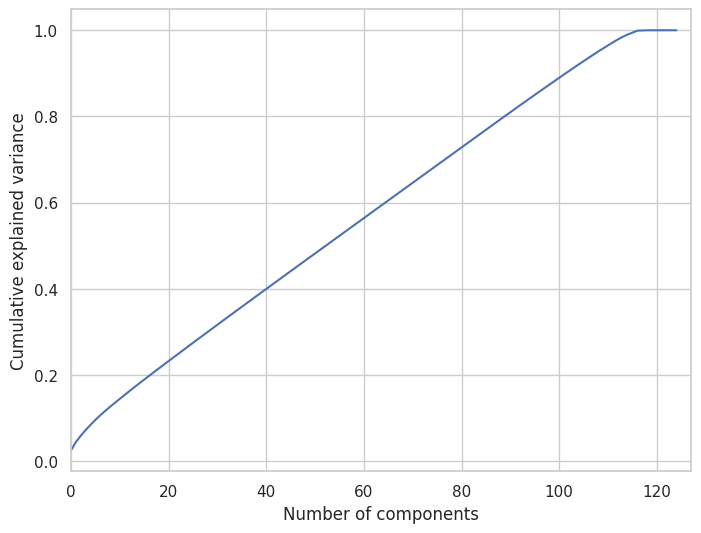

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,merged_df.shape[1],1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1, penalty='l2')
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [80, 100, 120],
    "logistic__C": np.logspace(-4, 4, 4),
    "logistic__class_weight": [None, 'balanced']
}
search = GridSearchCV(pipe, param_grid, n_jobs=2, scoring='roc_auc')
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.588):
{'logistic__C': 10000.0, 'logistic__class_weight': None, 'pca__n_components': 120}


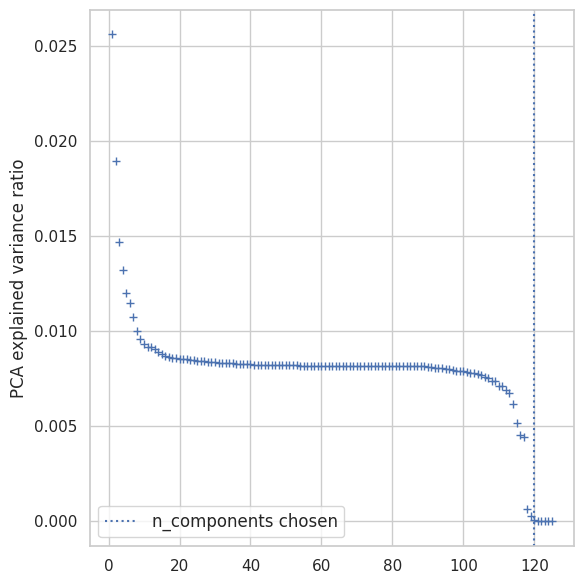

In [ ]:
# Plot the PCA spectrum
pca.fit(X_train)

plt.figure(figsize=(6, 6))
plt.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
plt.ylabel("PCA explained variance ratio")

plt.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
plt.legend(prop=dict(size=12))

plt.tight_layout()
plt.show()

In [ ]:
best_logreg = search.best_estimator_
y_train_pred_lg = best_logreg.predict(X_train)
y_pred_lg = best_logreg.predict(X_test)

In [ ]:
print('Logistic Regression Performance')

print('Training ROC AUC: {0:0.4f}'.format(roc_auc_score(y_train, y_train_pred_lg)))
print('Testing ROC AUC: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_lg)))

print('Training AUPRC: {0:0.4f}'.format(average_precision_score(y_train, y_train_pred_lg)))
print('Testing AUPRC: {0:0.4f}'.format(average_precision_score(y_test, y_pred_lg)))

print('Training Accuracy: {0:0.4f}'.format(accuracy_score(y_train, y_train_pred_lg)))
print('Testing Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lg)))

print('Training Recall: {0:0.4f}'.format(recall_score(y_train, y_train_pred_lg)))
print('Testing Recall: {0:0.4f}'.format(recall_score(y_test, y_pred_lg)))

print('Training Precision: {0:0.4f}'.format(precision_score(y_train, y_train_pred_lg)))
print('Testing Precision: {0:0.4f}'.format(precision_score(y_test, y_pred_lg)))

Logistic Regression Performance
Training ROC AUC: 0.6268
Testing ROC AUC: 0.6183
Training AUPRC: 0.4032
Testing AUPRC: 0.3107
Training Accuracy: 0.7566
Testing Accuracy: 0.7974
Training Recall: 0.3240
Testing Recall: 0.3084
Training Precision: 0.6483
Testing Precision: 0.5343


For the logistic regression model with PCA performed, I see that training and testing scores are much more comparable. This suggests that the model is not overfitting to the training data.

**Regularized Logistic Regression**

In [ ]:
# Instantiate the Logistic Regression model with L2 regularization (Ridge)
ridge_logreg = LogisticRegression(penalty='l2', class_weight='balanced', solver='liblinear', C=1.0)

# Fit the Ridge logistic regression model on the training data
ridge_logreg.fit(X_train, y_train)

# Predict the target values on the test set
y_pred_ridge = ridge_logreg.predict(X_test)
y_train_pred_ridge = ridge_logreg.predict(X_train)

In [ ]:
print('Logistic Regression with L2 Regularization Performance')

print('Training AUPRC: {0:0.4f}'.format(average_precision_score(y_train, y_train_pred_ridge)))
print('Testing AUPRC: {0:0.4f}'.format(average_precision_score(y_test, y_pred_ridge)))

print('Training Accuracy: {0:0.4f}'.format(accuracy_score(y_train, y_train_pred_ridge)))
print('Testing Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_ridge)))

print('Training Recall: {0:0.4f}'.format(recall_score(y_train, y_train_pred_ridge)))
print('Testing Recall: {0:0.4f}'.format(recall_score(y_test, y_pred_ridge)))

print('Training Precision: {0:0.4f}'.format(precision_score(y_train, y_train_pred_ridge)))
print('Testing Precision: {0:0.4f}'.format(precision_score(y_test, y_pred_ridge)))

Logistic Regression with L2 Regularization Performance
Training AUPRC: 0.4280
Testing AUPRC: 0.3306
Training Accuracy: 0.7142
Testing Accuracy: 0.7144
Training Recall: 0.6641
Testing Recall: 0.6548
Training Precision: 0.4999
Testing Precision: 0.3936


**Validation Curve**

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.01, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(ridge_logreg, X_train, y_train, param_name='C', param_range=param_range, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

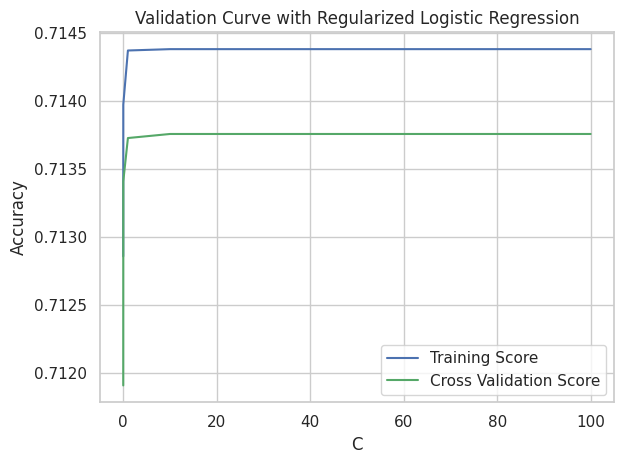

In [ ]:
# Plot mean accuracy scores for training and testing scores
plt.plot(param_range, train_scores_mean,
         label="Training Score", color='b')
plt.plot(param_range, test_scores_mean,
         label="Cross Validation Score", color='g')

# Creating the plot
plt.title("Validation Curve with Regularized Logistic Regression")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ridge))

              precision    recall  f1-score   support

         0.0       0.89      0.73      0.80     26848
         1.0       0.39      0.65      0.49      7178

    accuracy                           0.71     34026
   macro avg       0.64      0.69      0.65     34026
weighted avg       0.78      0.71      0.74     34026



**Confusion Matrix**

Confusion matrix

 [[19608  7240]
 [ 2478  4700]]

True Positives(TP) =  19608

True Negatives(TN) =  4700

False Positives(FP) =  7240

False Negatives(FN) =  2478


<Axes: >

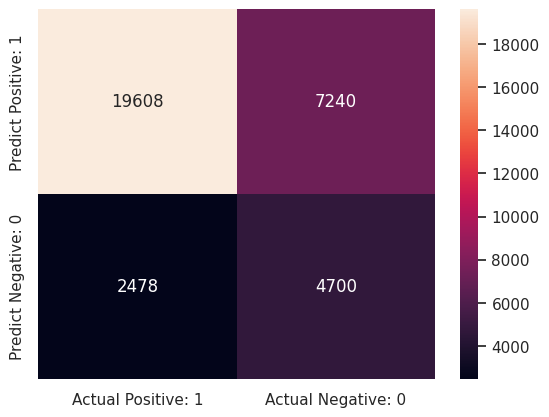

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ridge)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive: 1', 'Actual Negative: 0'],
                                 index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

### **Model 3: CatBoost Using Categorical Features directly**

https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook


In [ ]:
!pip install catboost==1.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.1 MB/s eta 0:00:00


In [ ]:
import catboost
from catboost import CatBoostClassifier

In [ ]:
# Merge dataframes
cat_merged_df = pd.merge(ordered_cs_df, cleaned_diversion_df, on="case_participant_id", how="left")
cat_merged_df.head()

,case_participant_id,offense_category,sentence_judge,sentence_type,age_at_incident,race,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated,diversion_program,diversion_count,diversion_result
0,670458920516,PROMIS Conversion,1.0,Prison,31.0,Black,0,1.0,2011.0,7.0,27.0,2.0,1.0,NaN,NaN,NaN
1,670458920516,PROMIS Conversion,1.0,Prison,31.0,Black,0,1.0,2011.0,7.0,27.0,2.0,1.0,NaN,NaN,NaN
2,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],0,1.0,2012.0,8.0,7.0,0.0,1.0,NaN,NaN,NaN
3,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],0,1.0,2012.0,8.0,7.0,0.0,1.0,NaN,NaN,NaN
4,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],0,1.0,2012.0,8.0,7.0,0.0,1.0,NaN,NaN,NaN


In [ ]:
cat_merged_df['diversion_count'].fillna(0, inplace=True)

# Fill missing values in 'diversion_program' with 'n/a'
cat_merged_df['diversion_program'].fillna('n/a', inplace=True)

# Fill missing values in 'diversion_result' with 'n/a'
cat_merged_df['diversion_result'].fillna('n/a', inplace=True)
cat_merged_df.head()

,case_participant_id,offense_category,sentence_judge,sentence_type,age_at_incident,race,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated,diversion_program,diversion_count,diversion_result
0,670458920516,PROMIS Conversion,1.0,Prison,31.0,Black,0,1.0,2011.0,7.0,27.0,2.0,1.0,n/a,0.0,n/a
1,670458920516,PROMIS Conversion,1.0,Prison,31.0,Black,0,1.0,2011.0,7.0,27.0,2.0,1.0,n/a,0.0,n/a
2,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],0,1.0,2012.0,8.0,7.0,0.0,1.0,n/a,0.0,n/a
3,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],0,1.0,2012.0,8.0,7.0,0.0,1.0,n/a,0.0,n/a
4,386948574911,Attempt Homicide,1.0,Prison,39.0,White [Hispanic or Latino],0,1.0,2012.0,8.0,7.0,0.0,1.0,n/a,0.0,n/a


In [ ]:
cat_merged_df = cat_merged_df.sample(frac=1)

cat_repeat_df = cat_merged_df.loc[cat_merged_df['repeated'] == 1]
cat_one_time_df = cat_merged_df.loc[cat_merged_df['repeated'] == 0][:35889]

cat_df = pd.concat([cat_repeat_df, cat_one_time_df])

# Shuffle dataframe rows
cat_df = cat_df.sample(frac=1, random_state=42)

cat_df.head()

,case_participant_id,offense_category,sentence_judge,sentence_type,age_at_incident,race,gender,incident_city,arrest_year,arrest_month,arrest_day,arrest_time,repeated,diversion_program,diversion_count,diversion_result
29318,2277999803575,UUW - Unlawful Use of Weapon,1.0,Prison,29.0,Black,0,1.0,2012.0,5.0,14.0,3.0,1.0,n/a,0.0,n/a
19345,2250704720597,UUW - Unlawful Use of Weapon,1.0,Prison,21.0,White [Hispanic or Latino],0,1.0,2011.0,11.0,29.0,3.0,1.0,n/a,0.0,n/a
64135,2384354226499,Narcotics,1.0,Prison,22.0,Black,0,1.0,2013.0,12.0,11.0,2.0,0.0,n/a,0.0,n/a
55337,2355172194710,Narcotics,1.0,Prison,21.0,White,1,1.0,2013.0,7.0,9.0,2.0,1.0,n/a,0.0,n/a
157959,2785902700148,UUW - Unlawful Use of Weapon,0.0,Prison,30.0,Black,0,1.0,2020.0,12.0,3.0,1.0,1.0,n/a,0.0,n/a


In [ ]:
# Assign features to x and label to y
cat_x = cat_df.drop(columns=['repeated', 'case_participant_id'])
cat_y = cat_df['repeated']

# Split the data into training and testing sets
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(cat_x, cat_y, test_size=0.2, stratify=cat_y, shuffle=True, random_state=42)

In [ ]:
# Scale the numerical features
scaler = StandardScaler()

# Select numerical features, excluding 'repeated' column
numerical_columns = cat_df.select_dtypes(include=['float']).columns
features_scale = [col for col in numerical_columns if col != 'repeated']

# Fit and transform the training data
X_train_cat[features_scale] = scaler.fit_transform(X_train_cat[features_scale])

# Transform the testing data using the learned parameters from the training data
X_test_cat[features_scale] = scaler.transform(X_test_cat[features_scale])

# Convert X_train, y_train, X_test, y_test into numpy arrays
X_train_cat = X_train_cat.values
X_test_cat = X_test_cat.values
y_train_cat = y_train_cat.values
y_test_cat = y_test_cat.values

In [ ]:
cat_features_names = ['offense_category', 'sentence_type', 'race', 'gender', 'diversion_program', 'diversion_result'] # here I specify names of categorical features
cat_features = [cat_x.columns.get_loc(col) for col in cat_features_names]
print(cat_features)

[0, 2, 4, 5, 11, 13]


In [ ]:
params = {'loss_function':'Logloss',
          'eval_metric':'PRAUC',
          'early_stopping_rounds': 200,
          'cat_features': cat_features,
          'verbose': 200,
          'random_seed': 12345,
          'iterations': 2000
         }
cbc_2 = CatBoostClassifier(**params)
cbc_2.fit(X_train_cat, y_train_cat,
          eval_set=(X_test_cat, y_test_cat),
          use_best_model=True,
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.063779
0:	learn: 0.7372834	test: 0.7439279	best: 0.7439279 (0)	total: 151ms	remaining: 5m 2s
200:	learn: 0.7861397	test: 0.7866447	best: 0.7866447 (200)	total: 40.8s	remaining: 6m 4s
400:	learn: 0.7993361	test: 0.7915150	best: 0.7915435 (396)	total: 1m 10s	remaining: 4m 40s
600:	learn: 0.8098150	test: 0.7948023	best: 0.7948023 (600)	total: 1m 33s	remaining: 3m 37s
800:	learn: 0.8181614	test: 0.7973224	best: 0.7973224 (800)	total: 2m 11s	remaining: 3m 16s
1000:	learn: 0.8246865	test: 0.7991210	best: 0.7991832 (988)	total: 2m 33s	remaining: 2m 33s
1200:	learn: 0.8306904	test: 0.8004144	best: 0.8004196 (1199)	total: 2m 57s	remaining: 1m 58s
1400:	learn: 0.8362526	test: 0.8017159	best: 0.8017159 (1400)	total: 3m 20s	remaining: 1m 25s
1600:	learn: 0.8415793	test: 0.8027756	best: 0.8027756 (1600)	total: 3m 44s	remaining: 56s
1800:	learn: 0.8462804	test: 0.8042884	best: 0.8042884 (1800)	total: 4m 10s	remaining: 27.7s
1999:	learn: 0.8514355	test: 0.8053103	best: 0.805317

In [ ]:
feature_importance_df = pd.DataFrame({'feature_importance': cbc_2.get_feature_importance(),
              'feature_names': cat_x.columns}).sort_values(by=['feature_importance'],
                                                           ascending=False)

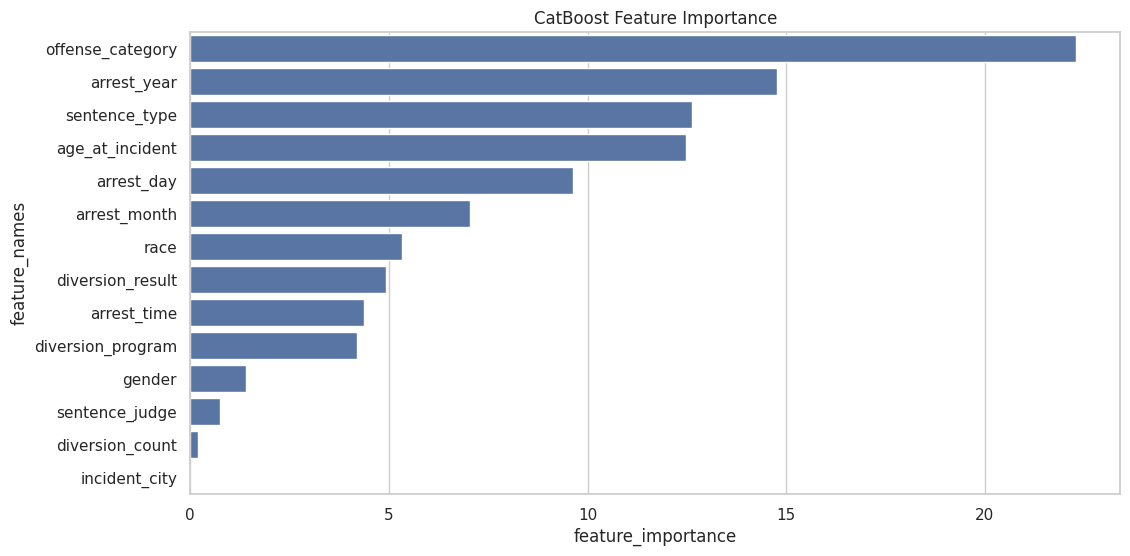

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6));
sns.barplot(x="feature_importance", y="feature_names", data=feature_importance_df);
plt.title('CatBoost Feature Importance');

In [ ]:
# Predict the target values on the test set
y_pred_cat2 = cbc_2.predict(X_test_cat)
average_precision_score(y_test_cat, y_pred_cat2)

0.6665997929691467

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

#RandomSearchCV
cbc = CatBoostClassifier(**params)
from scipy.stats import uniform, randint

# Creating the hyperparameter grid
param_dist = { "learning_rate": np.linspace(0,0.2,5),
               "max_depth": randint(3, 10)
             }

param_grid = {
    'learning_rate': uniform(0.01, 0.3),  # Continuous uniform distribution
    'max_depth': randint(3, 10),               # Discrete uniform distribution
    'l2_leaf_reg': uniform(0, 5),          # Continuous uniform distribution
}


#Instantiate RandomSearchCV object
rscv = RandomizedSearchCV(cbc , param_dist, scoring='average_precision', cv=3)

# Perform RandomizedSearchCV
rscv.fit(X_train_cat, y_train_cat)


# Print the tuned parameters and score
print(rscv.best_params_)
print(rscv.best_score_)
print(rscv.best_estimator_)
best_cat_model = rscv.best_estimator_

0:	learn: 0.7225433	total: 138ms	remaining: 4m 34s
200:	learn: 0.7836693	total: 19.4s	remaining: 2m 53s
400:	learn: 0.7903396	total: 27.8s	remaining: 1m 50s
600:	learn: 0.7947468	total: 36.8s	remaining: 1m 25s
800:	learn: 0.7992733	total: 46.1s	remaining: 1m 8s
1000:	learn: 0.8031529	total: 53.4s	remaining: 53.3s
1200:	learn: 0.8058414	total: 1m 2s	remaining: 41.7s
1400:	learn: 0.8082141	total: 1m 11s	remaining: 30.5s
1600:	learn: 0.8111608	total: 1m 19s	remaining: 19.8s
1800:	learn: 0.8136803	total: 1m 29s	remaining: 9.89s
1999:	learn: 0.8160942	total: 1m 38s	remaining: 0us
0:	learn: 0.7186072	total: 67.2ms	remaining: 2m 14s
200:	learn: 0.7809185	total: 7.74s	remaining: 1m 9s
400:	learn: 0.7877166	total: 17.1s	remaining: 1m 8s
600:	learn: 0.7923488	total: 28.3s	remaining: 1m 5s
800:	learn: 0.7966827	total: 35.9s	remaining: 53.7s
1000:	learn: 0.8003341	total: 47.2s	remaining: 47.1s
1200:	learn: 0.8034957	total: 56.5s	remaining: 37.6s
1400:	learn: 0.8062464	total: 1m 3s	remaining: 27.4s

In [ ]:
# Evaluate the best model on the test data
y_pred_cat = best_cat_model.predict(X_test_cat)

# Compare with training data
y_train_pred_cat = best_cat_model.predict(X_train_cat)

In [ ]:
print('Catboost Performance')

print('Training AUPRC: {0:0.4f}'.format(average_precision_score(y_train_cat, y_train_pred_cat)))
print('Testing AUPRC: {0:0.4f}'.format(average_precision_score(y_test_cat, y_pred_cat)))

print('Training Accuracy: {0:0.4f}'.format(accuracy_score(y_train_cat, y_train_pred_cat)))
print('Testing Accuracy: {0:0.4f}'.format(accuracy_score(y_test_cat, y_pred_cat)))

print('Training Recall: {0:0.4f}'.format(recall_score(y_train_cat, y_train_pred_cat)))
print('Testing Recall: {0:0.4f}'.format(recall_score(y_test_cat, y_pred_cat)))

print('Training Precision: {0:0.4f}'.format(precision_score(y_train_cat, y_train_pred_cat)))
print('Testing Precision: {0:0.4f}'.format(precision_score(y_test_cat, y_pred_cat)))

Catboost Performance
Training AUPRC: 0.9079
Testing AUPRC: 0.7195
Training Accuracy: 0.9352
Testing Accuracy: 0.7831
Training Recall: 0.9339
Testing Recall: 0.8024
Training Precision: 0.9367
Testing Precision: 0.7733


In [ ]:
import streamlit as st

def main():
    # Set background image
    page_bg_img = f"""
    <style>
    [data-testid="stAppViewContainer"] > .main {{
    background-image: url("https://wallpapers.com/images/high/gradient-background-7xsdz99i2ljokhwn.webp");
    background-size: cover;
    background-position: center center;
    background-repeat: repeat;
    background-attachment: local;
    }}
    [data-testid="stHeader"] {{
    background: rgba(249, 55, 55, 0);
    }}
    </style>
    """
    st.markdown(page_bg_img, unsafe_allow_html=True)

    # Add a sidebar
    st.sidebar.title("Navigation")
    page = st.sidebar.radio("Go to", ["Introduction"])

    if page == "Introduction":
        show_introduction()

def show_introduction():
    st.title("Predicting Recidivism in Chicago: Overview")
    st.markdown("""

    ### Data Sources:
    - [Chicago Sentencing Data](https://datacatalog.cookcountyil.gov/Courts/Sentencing/tg8v-tm6u): This dataset includes information about court decisions reflecting the judgment issued by the court on individuals who have been found guilty of a felony offense.
    - [Chicago Diversion Program Data](https://datacatalog.cookcountyil.gov/Courts/Diversion/gpu3-5dfh): This dataset includes information on defendants who receive a referral to a diversion program.

    ### Objective and Value Proposition:
    In the US, many individuals are dismissed from prison without having had the proper rehabilitation to integrate back into society, significantly increasing the risk of recidivism. In Chicago, recidivism rates can reach 89% each year, which means that 89% of formerly incarcerated individuals commit another crime within three years of their dismissal. I believe that understanding the factors that predict repeat crime is key to allowing us to implement changes to end the cycle of recidivism in the American criminal justice system.

    Our model aims to predict recidivism among individuals found in prior criminal records in Chicago. I plan to use demographic and geographic information, historical crime data, and other determinants in our datasets to achieve this predictive model.
    """)

if __name__ == "__main__":
    main()
